In [5]:
import tushare as ts    #安装并调用tushare，获取股价信息
import numpy as np
import pandas as pd
from datetime import datetime
ts.set_token('fe9ff67e8a79bbced955fd3b5ee351368d7ab2abf1af8668b096d88a')    
#设置数据库的个人token（请勿外露！）
ts_pro = ts.pro_api()      #获取部分白酒业上市公司过去一年的日线行情
df = ts_pro.daily(ts_code='600519.SH,000858.SZ,002304.SZ,000568.SZ,600809.SH,000596.SZ',start_date='20230101',end_date='20231231')
df = df.reindex(index=df.index[::-1])  #重新索引为原来相反的方向
df = df.reset_index(drop=True)  #对索引进行重新编号
#将股票代码转换为股票名称
change= {'600519.SH':'贵州茅台','000858.SZ':'五粮液','002304.SZ':'洋河股份','000568.SZ':'泸州老窖','600809.SH':'山西汾酒','000596.SZ':'古井贡酒'}
df['name'] = df['ts_code'].map(change)
df.head(6)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,name
0,600809.SH,20230103,284.21,284.21,272.00,275.84,284.99,-9.15,-3.2106,72342.10,1990649.136,山西汾酒
1,600519.SH,20230103,1731.20,1738.43,1706.01,1730.01,1727.00,3.01,0.1743,26033.80,4487760.231,贵州茅台
2,002304.SZ,20230103,160.01,160.23,155.71,157.13,160.50,-3.37,-2.0997,62158.01,976852.732,洋河股份
3,000858.SZ,20230103,181.00,181.81,176.51,178.20,180.69,-2.49,-1.3781,182062.04,3240728.572,五粮液
4,000596.SZ,20230103,266.90,267.87,260.34,263.45,266.90,-3.45,-1.2926,17990.50,473175.770,古井贡酒
5,000568.SZ,20230103,224.00,225.28,217.79,219.86,224.28,-4.42,-1.9708,92381.52,2030869.788,泸州老窖


In [71]:
df.isnull().sum()  #数据无缺失值

ts_code       0
trade_date    0
open          0
high          0
low           0
close         0
pre_close     0
change        0
pct_chg       0
vol           0
amount        0
name          0
dtype: int64

In [72]:
df.to_csv('2023年部分白酒业上市公司股价日线行情.csv',index=False) #将使用tushare获取的数据集保存为csv文件

In [73]:
#选取贵州茅台作为分析的对象
df = df[df['name']=='贵州茅台']    
df = df.reset_index(drop=True)  #对索引进行重新编号
df.tail()  
#由于假期休市等原因，共得到242个有效观测值

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,name
237,600519.SH,20231225,1671.00,1678.60,1668.00,1672.00,1670.65,1.35,0.0808,12471.06,2086014.390,贵州茅台
238,600519.SH,20231226,1672.50,1674.90,1657.50,1670.00,1672.00,-2.00,-0.1196,14771.26,2457177.339,贵州茅台
239,600519.SH,20231227,1668.00,1677.15,1661.00,1667.06,1670.00,-2.94,-0.1760,16055.50,2679221.365,贵州茅台
240,600519.SH,20231228,1670.99,1727.99,1667.06,1724.99,1667.06,57.93,3.4750,38338.06,6537401.380,贵州茅台
241,600519.SH,20231229,1720.00,1749.58,1720.00,1726.00,1724.99,1.01,0.0586,27538.68,4768857.531,贵州茅台


In [74]:
#进行描述性统计
df.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,1770.063678,1784.268678,1753.735165,1768.294545,1768.112645,0.181901,0.019063,23254.322149,4.110261e+06
std,67.381259,66.656030,65.246337,66.249835,66.479274,22.676288,1.290996,9600.052330,1.694437e+06
min,1618.000000,1653.360000,1616.250000,1628.900000,1628.900000,-98.000000,-5.671300,11121.430000,2.055272e+06
25%,1716.092500,1733.662500,1705.260000,1717.932500,1717.932500,-12.732500,-0.720125,17210.215000,3.043910e+06
50%,1772.790000,1784.940000,1756.490000,1770.785000,1770.785000,-1.025000,-0.062350,20781.125000,3.653176e+06
75%,1819.750000,1829.877500,1802.247500,1818.385000,1818.385000,9.095000,0.518250,27027.807500,4.797731e+06
max,1914.000000,1935.000000,1895.000000,1912.900000,1912.900000,96.410000,5.723100,93143.080000,1.674729e+07


In [88]:
date_time_objects = [datetime.strptime(date_string, '%Y%m%d').date() for date_string in df['trade_date']]
df['date'] = date_time_objects
df['month']=[d.month for d in df['date']]
month_label=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df['monthf']=df['month'].replace(np.arange(1,13,1), month_label)#进行替换
df['monthf']=pd.Categorical(df['monthf'], categories=month_label, ordered=True)
df_grouped = df.groupby('monthf')
describe_data = df_grouped.describe()
# 将描述性统计数据存储为 CSV 文件
describe_data.to_csv("describe_statistics.csv", index=False)
df_grouped.describe()

open                                                                   \
       count         mean        std      min        25%       50%        75%   
monthf                                                                          
Jan     16.0  1845.431875  64.114017  1730.00  1827.7800  1852.000  1893.5000   
Feb     20.0  1824.945500  28.346693  1778.00  1809.5200  1820.500  1848.8250   
Mar     23.0  1781.536957  29.184376  1735.00  1764.8900  1778.370  1802.4900   
Apr     19.0  1759.329474  36.458814  1690.00  1742.0000  1753.000  1791.9400   
May     20.0  1715.541000  30.327662  1661.01  1700.7500  1710.995  1731.3325   
Jun     20.0  1700.524500  42.249427  1618.00  1669.0400  1704.995  1730.5050   
Jul     21.0  1751.615238  56.371279  1699.00  1713.0400  1730.000  1756.0000   
Aug     23.0  1845.032174  39.646936  1779.62  1808.1850  1860.000  1881.4750   
Sep     20.0  1829.732500  22.152144  1776.31  1818.7525  1825.790  1848.7750   
Oct     17.0  1711.771765  59.847395  1629.97  1667.0000  1700.000  1770.8800   
Nov     22.0  1782.455909  21.563801  1752.00  1772.5350  1779.500  1787.7625   
Dec     21.0  1689.390952  39.202904  1640.00  1665.9600  1672.500  1704.0000   

                 high               ...        amount               month  \
            max count         mean  ...           75%           max count   
monthf                              ...                                     
Jan     1914.00  16.0  1861.970625  ...  6.009485e+06  8.541587e+06  16.0   
Feb     1874.00  20.0  1843.095500  ...  5.665829e+06  7.595739e+06  20.0   
Mar     1839.77  23.0  1797.019565  ...  4.139296e+06  5.491052e+06  23.0   
Apr     1825.00  19.0  1769.876316  ...  4.955394e+06  8.732657e+06  19.0   
May     1769.00  20.0  1726.538000  ...  4.582767e+06  7.165754e+06  20.0   
Jun     1790.00  20.0  1719.826000  ...  4.437503e+06  6.742301e+06  20.0   
Jul     1908.00  21.0  1769.120000  ...  3.749635e+06  8.615280e+06  21.0   
Aug     1898.58  23.0  1859.907826  ...  4.573853e+06  7.633221e+06  23.0   
Sep     1868.00  20.0  1840.869000  ...  3.726579e+06  6.287833e+06  20.0   
Oct     1797.90  17.0  1724.670588  ...  5.279950e+06  1.214692e+07  17.0   
Nov     1850.00  22.0  1791.774091  ...  3.811580e+06  1.674729e+07  22.0   
Dec     1789.31  21.0  1703.237619  ...  5.830850e+06  6.703240e+06  21.0   

                                                 
        mean  std   min   25%   50%   75%   max  
monthf                                           
Jan      1.0  0.0   1.0   1.0   1.0   1.0   1.0  
Feb      2.0  0.0   2.0   2.0   2.0   2.0   2.0  
Mar      3.0  0.0   3.0   3.0   3.0   3.0   3.0  
Apr      4.0  0.0   4.0   4.0   4.0   4.0   4.0  
May      5.0  0.0   5.0   5.0   5.0   5.0   5.0  
Jun      6.0  0.0   6.0   6.0   6.0   6.0   6.0  
Jul      7.0  0.0   7.0   7.0   7.0   7.0   7.0  
Aug      8.0  0.0   8.0   8.0   8.0   8.0   8.0  
Sep      9.0  0.0   9.0   9.0   9.0   9.0   9.0  
Oct     10.0  0.0  10.0  10.0  10.0  10.0  10.0  
Nov     11.0  0.0  11.0  11.0  11.0  11.0  11.0  
Dec     12.0  0.0  12.0  12.0  12.0  12.0  12.0  

[12 rows x 80 columns]

In [76]:
#进行数据基础信息的展示、数据可视化
#导入相关模块
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
from datetime import datetime
from plotnine import *
#处理日期格式
date_time_objects = [datetime.strptime(date_string, '%Y%m%d').date() for date_string in df['trade_date']]
df['date'] = date_time_objects
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,name,date,month,monthf
0,600519.SH,20230103,1731.20,1738.43,1706.01,1730.01,1727.00,3.01,0.1743,26033.80,4487760.231,贵州茅台,2023-01-03,1,Jan
1,600519.SH,20230104,1730.00,1738.70,1716.00,1725.01,1730.01,-5.00,-0.2890,20415.75,3523582.306,贵州茅台,2023-01-04,1,Jan
2,600519.SH,20230105,1737.00,1801.00,1733.00,1801.00,1725.01,75.99,4.4052,47942.85,8541587.089,贵州茅台,2023-01-05,1,Jan
3,600519.SH,20230106,1806.12,1811.90,1787.00,1803.77,1801.00,2.77,0.1538,24903.75,4480838.898,贵州茅台,2023-01-06,1,Jan
4,600519.SH,20230109,1835.00,1849.98,1807.82,1841.20,1803.77,37.43,2.0751,30977.23,5684181.147,贵州茅台,2023-01-09,1,Jan


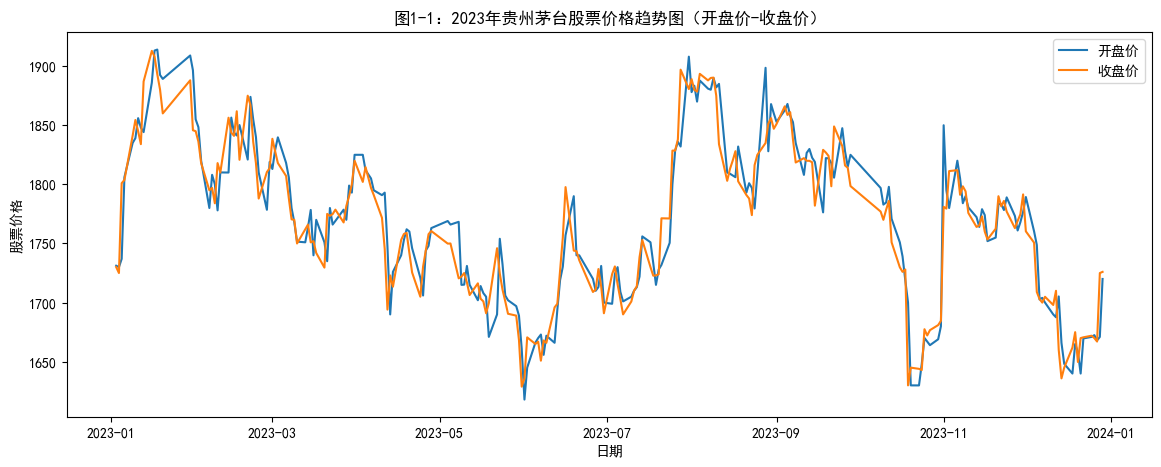

In [82]:
#绘制关于股价的折线图
#定义函数，绘制关于开盘-收盘价的折线图
def plot_df(df, x, y1, y2, title="", xlabel='日期', ylabel='股票价格', dpi=100):
    plt.figure(figsize=(14, 5), dpi=dpi)
    plt.plot(x, y1, label='开盘价')
    plt.plot(x, y2, label='收盘价')
    plt.title(title, fontsize=50)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()
# 调用 plot_df 函数
matplotlib.rcParams['font.sans-serif']=['SimHei'] #中文显示
plot_df(df, x=df['date'], y1=df['open'], y2=df['close'], title='图1-1：2023年贵州茅台股票价格趋势图（开盘价-收盘价）')
#2023.11.1茅台宣布涨价，股价飙升

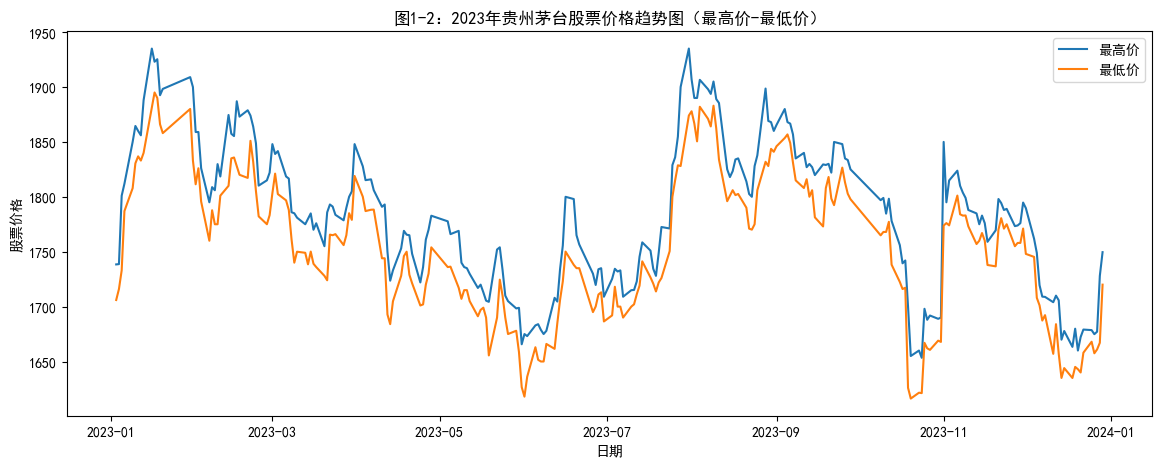

In [83]:
#定义函数，绘制关于最高-最低价的折线图
def plot_df(df, x, y1, y2, title="", xlabel='日期', ylabel='股票价格', dpi=100):
    plt.figure(figsize=(14, 5), dpi=dpi)
    plt.plot(x, y1, label='最高价')
    plt.plot(x, y2, label='最低价')
    plt.title(title, fontsize=50)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()

# 调用 plot_df 函数
plot_df(df, x=df['date'], y1=df['high'], y2=df['low'], title='图1-2：2023年贵州茅台股票价格趋势图（最高价-最低价）')

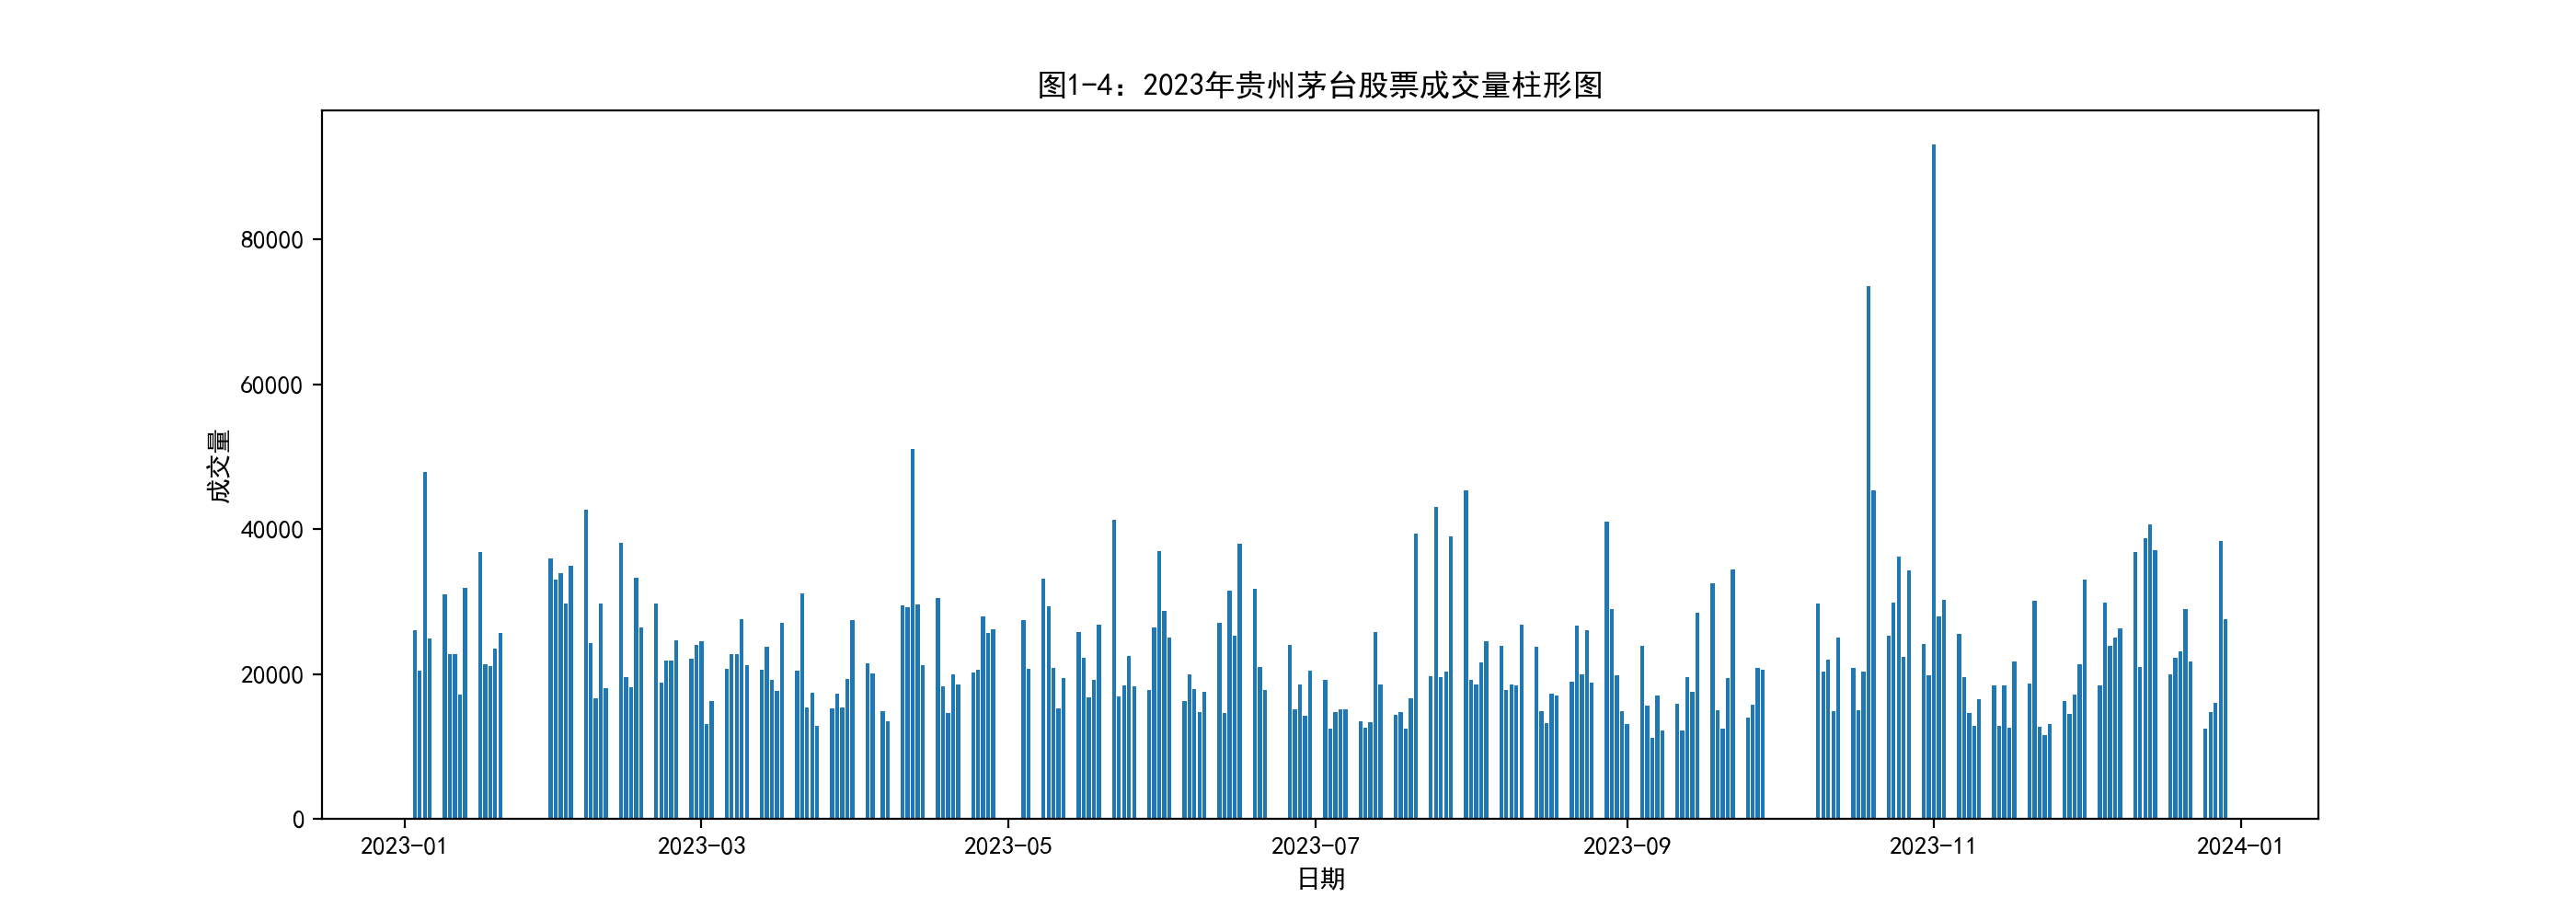

In [90]:
#绘制成交量的柱形图
plt.figure(figsize=(14, 5), dpi=100)
plt.bar(df['date'], df['vol'])
plt.title('图1-4：2023年贵州茅台股票成交量柱形图')
plt.xlabel('日期')
plt.ylabel('成交量')
plt.show()

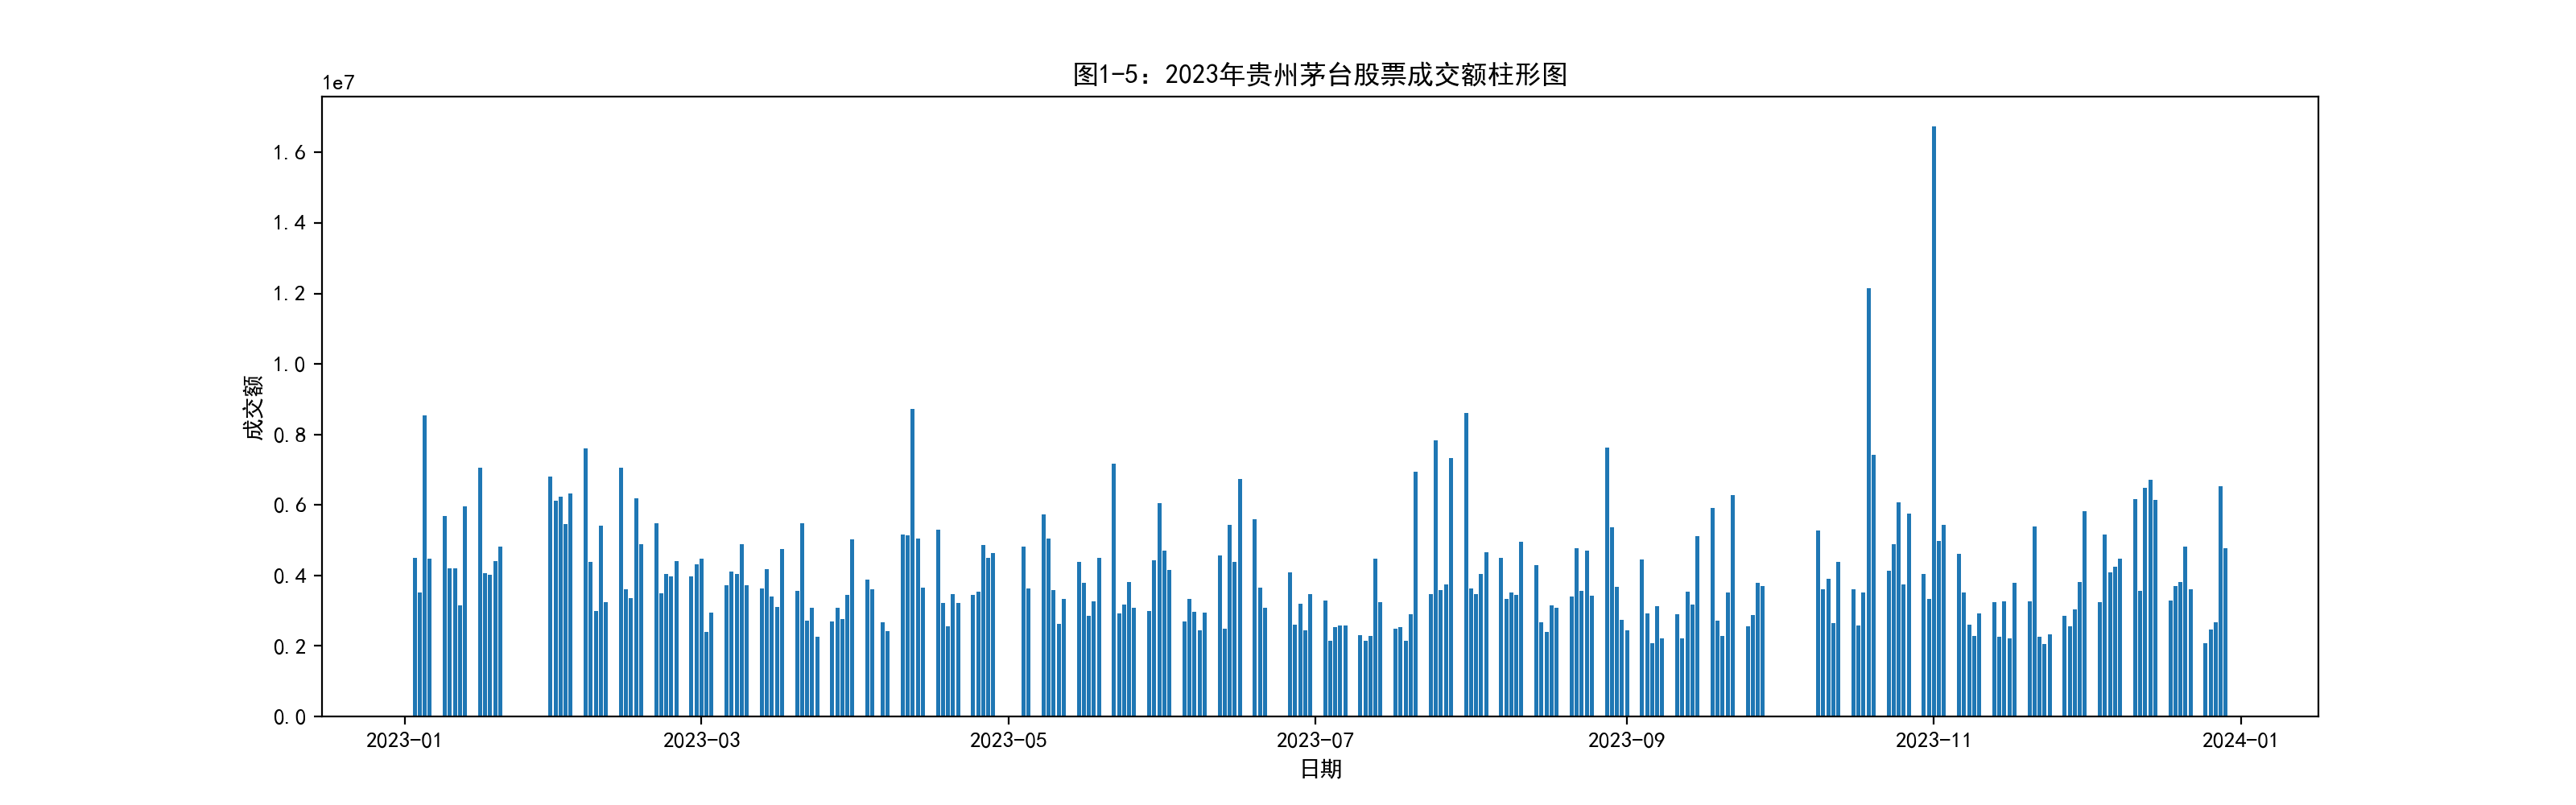

In [91]:
#绘制成交额的柱形图
plt.figure(figsize=(16, 5), dpi=100)
plt.bar(df['date'], df['amount'])
plt.title('图1-5：2023年贵州茅台股票成交额柱形图')
plt.xlabel('日期')
plt.ylabel('成交额')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10352\1614156904.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


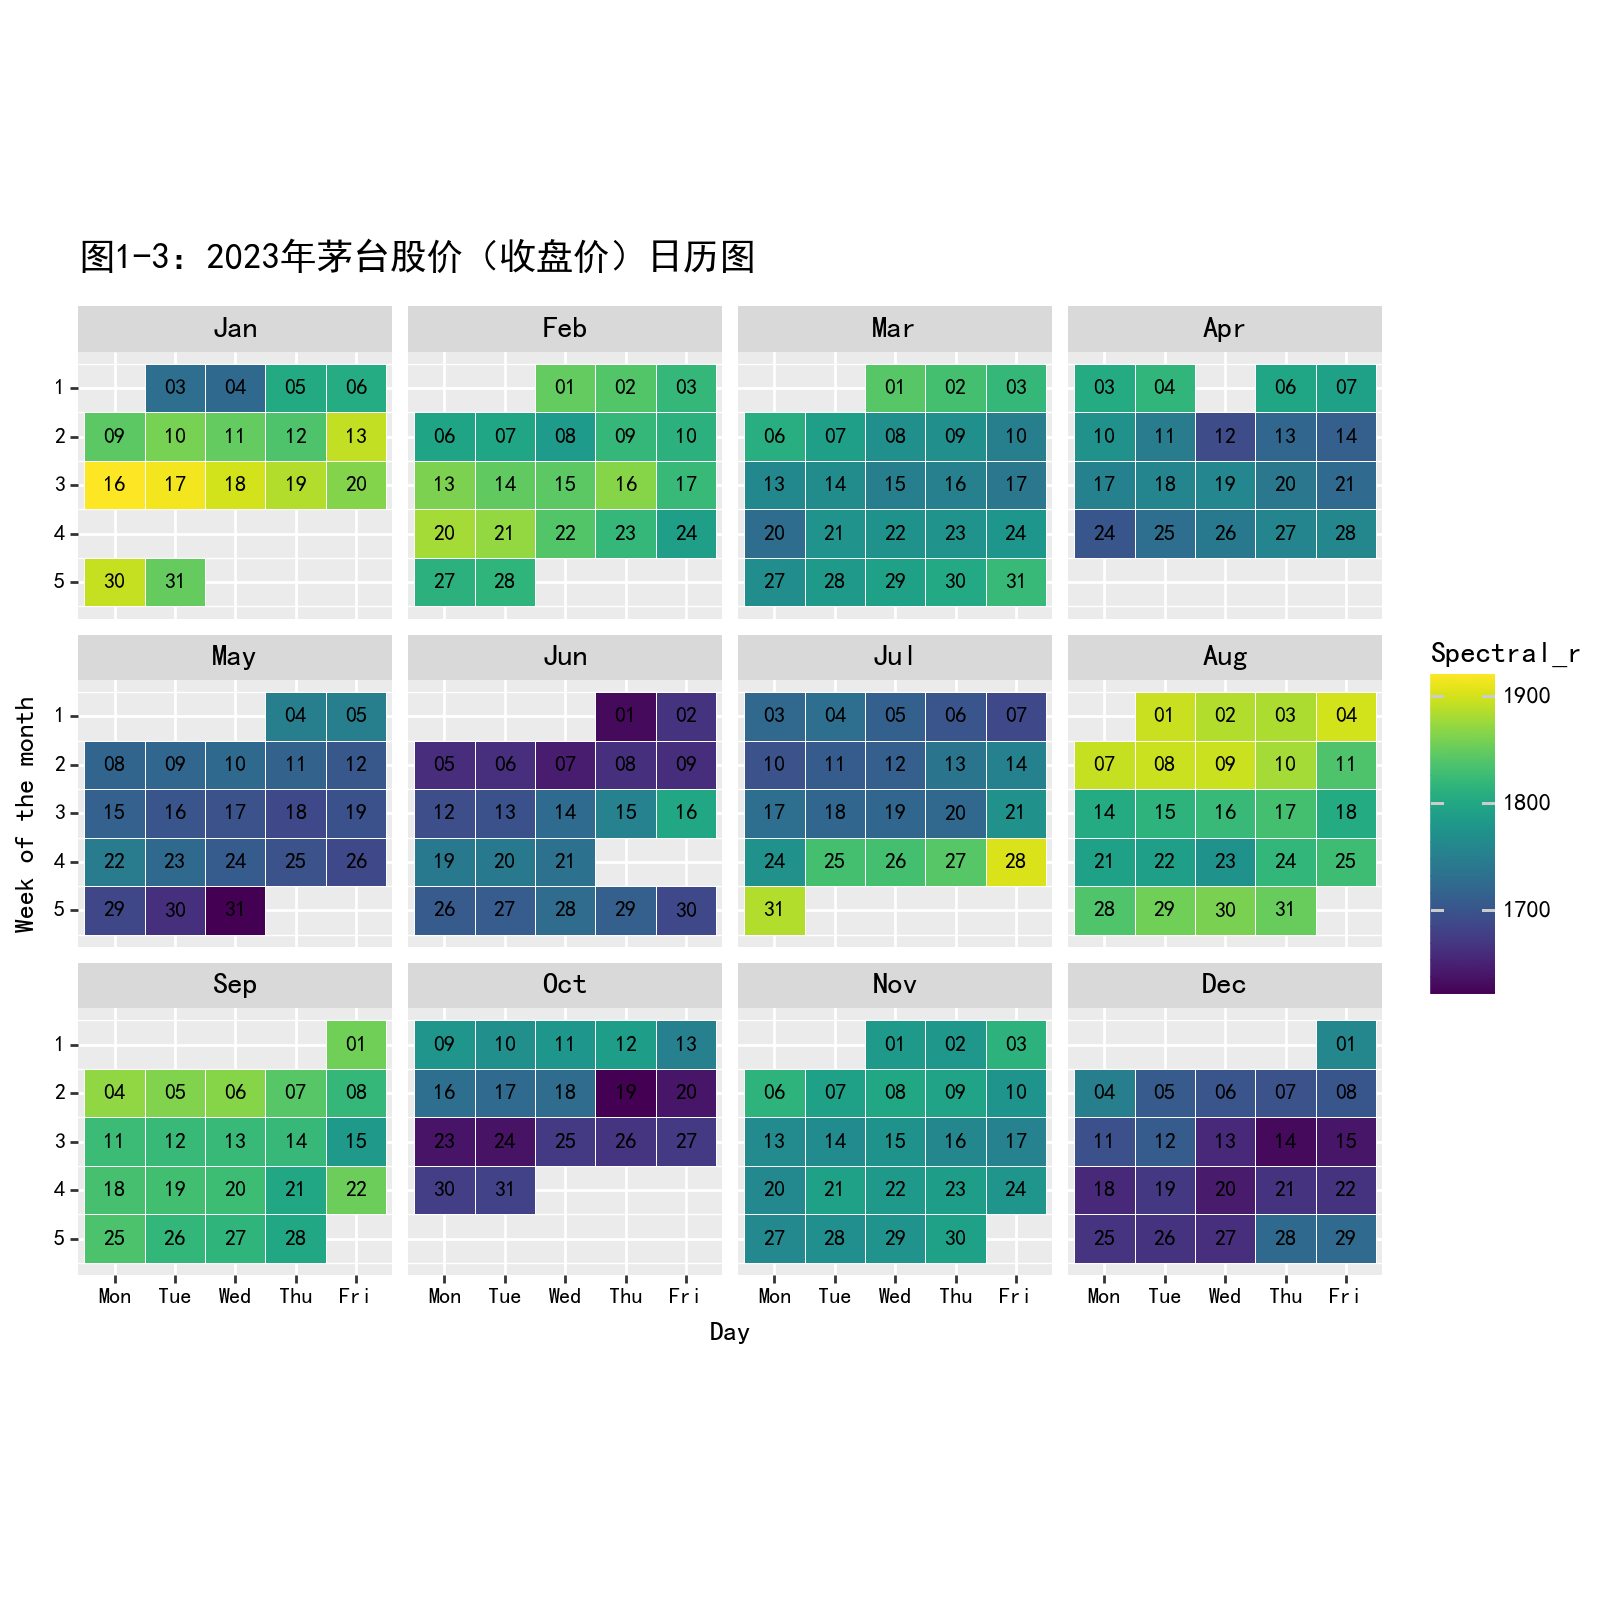

<Figure Size: (800 x 800)>

In [89]:
#画出2023年茅台股价（收盘价）的日历图
df['month']=[d.month for d in df['date']]
month_label=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df['monthf']=df['month'].replace(np.arange(1,13,1), month_label)#进行替换
df['monthf']=pd.Categorical(df['monthf'], categories=month_label, ordered=True)
df['week']=[int(d.strftime('%W')) for d in df['date']] #表示第几个星期 (从0开始)
df['weekay']=[int(d.strftime('%u')) for d in df['date']] #表示星期几

week_label=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
df['weekdayf']=df['weekay'].replace(np.arange(1,8,1), week_label)
df['weekdayf']=pd.Categorical(df['weekdayf'],categories=week_label,ordered=True)
df['day']=[d.strftime('%d') for d in df['date']]
df['monthweek']=df.groupby('monthf')['week'].apply(lambda x: x-x.min()+1)#每个月的第几个星期 （从1开始）
(
    ggplot(df, aes('weekdayf', 'monthweek', fill='close')) + 
    geom_tile(colour = "white",size=0.2) + 
    scale_fill_cmap(name ='Spectral_r')+
    geom_text(aes(label='day'),size=8)+
    facet_wrap('~monthf' ,nrow=3) + #根据月份分面
    scale_y_reverse()+
    xlab("Day") + ylab("Week of the month") +
    theme(strip_text = element_text(size=11,face="plain",color="black"),
         axis_title=element_text(size=10,face="plain",color="black"),
         axis_text = element_text(size=8,face="plain",color="black"),
         legend_position = 'right',
         legend_background = element_blank(),
         aspect_ratio =0.85,
         figure_size = (8, 8),
         dpi = 100)+
   labs(title = "图1-3：2023年茅台股价（收盘价）日历图") 
    + theme(text=element_text(family="SimHei"))
)

In [42]:
#茅台股价的走低并没有显著影响到成交量与成交额

Text(0.5, 1.0, '图2-2：茅台股价（收盘价）分月份箱线图')

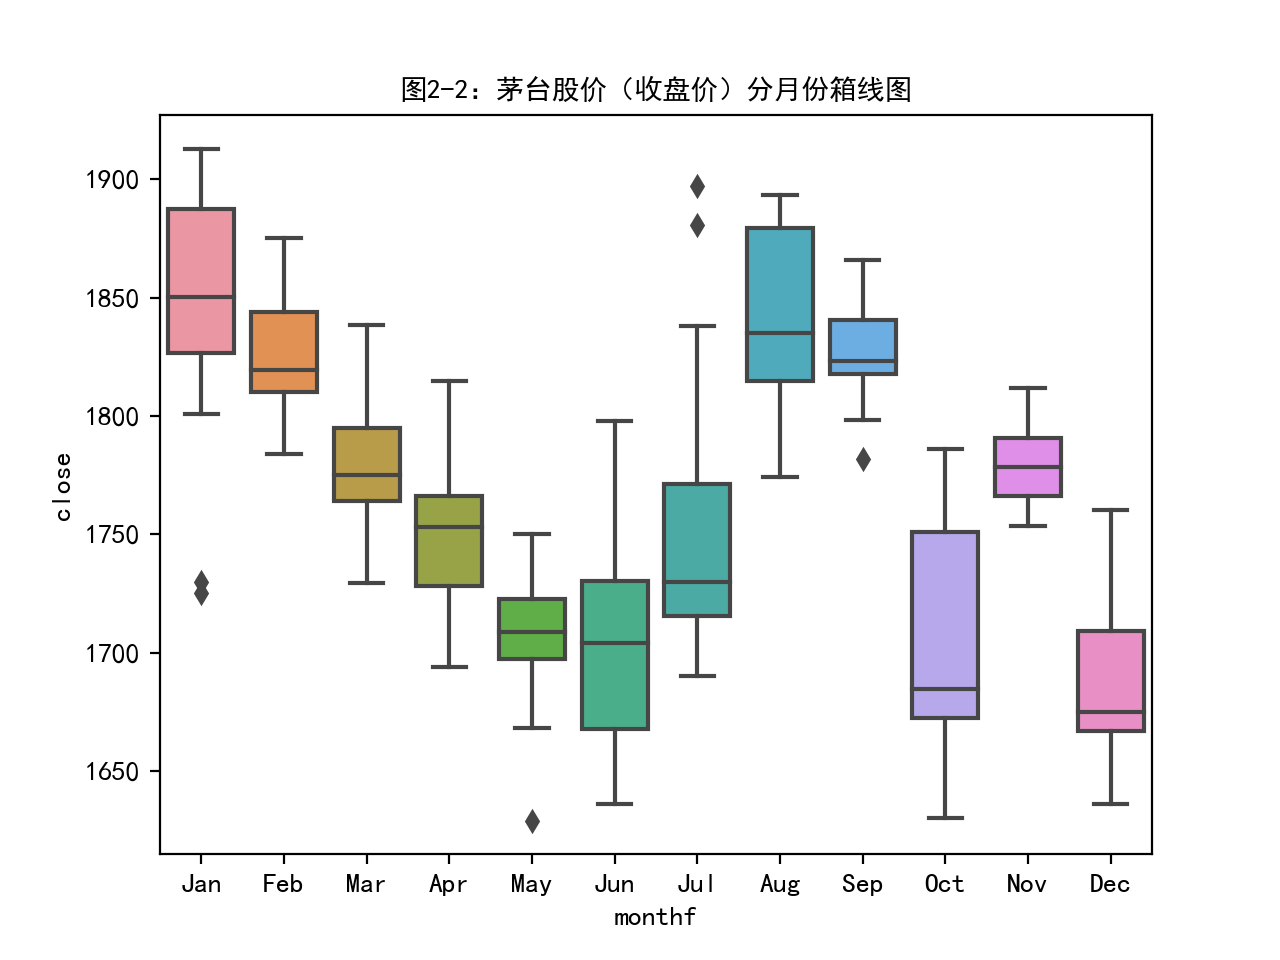

In [101]:
#画出分月份的收盘价箱线图
sns.boxplot(x='monthf', y=df['close'],data=df)
plt.title('图2-2：茅台股价（收盘价）分月份箱线图', fontsize=10)

Text(0.5, 1.0, '图2-1：茅台股价（开盘价）分月份箱线图')

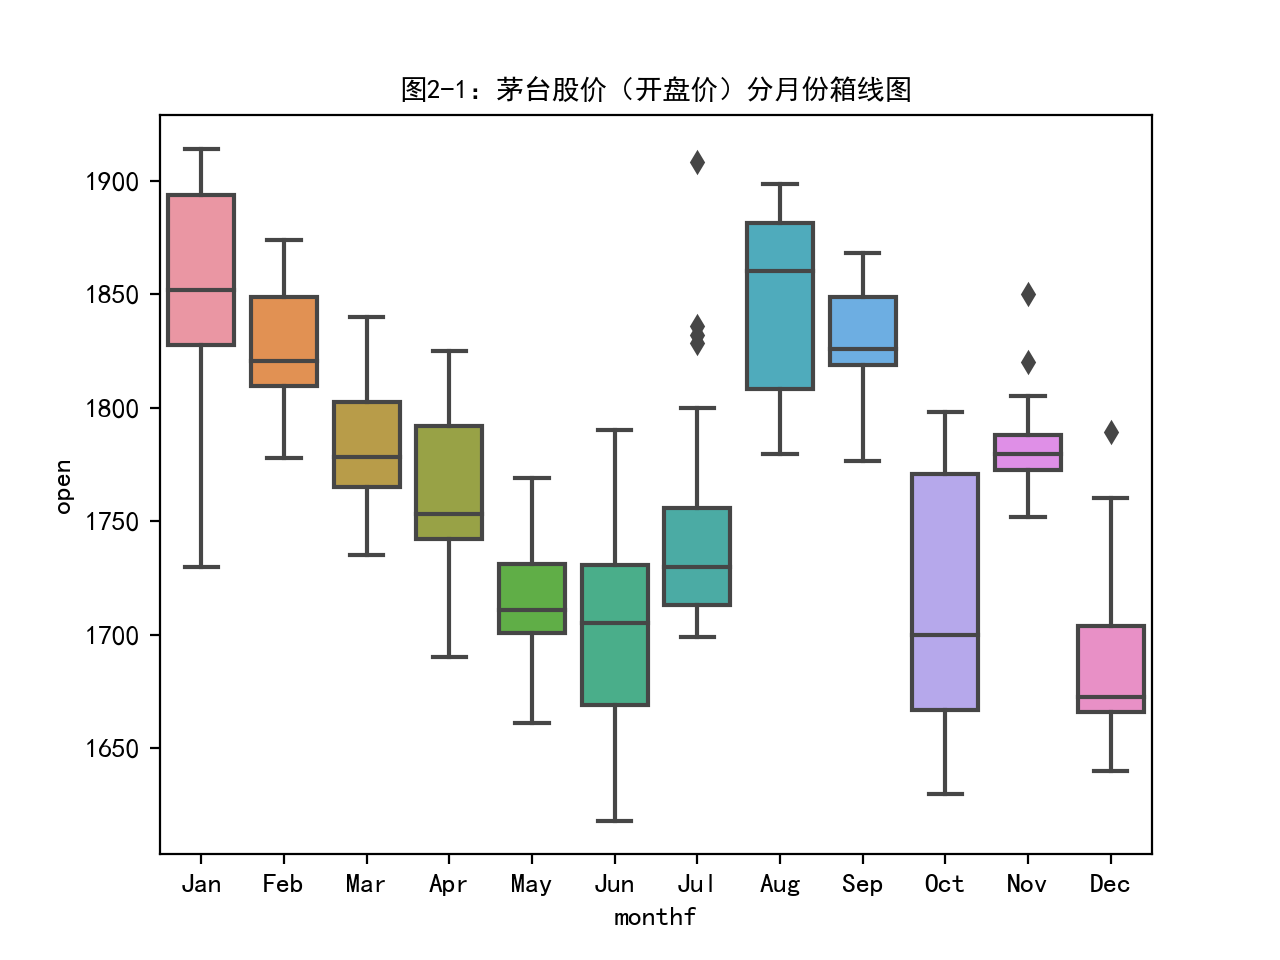

In [100]:
#画出分月份的开盘价箱线图
sns.boxplot(x='monthf', y=df['open'], data=df)
plt.title('图2-1：茅台股价（开盘价）分月份箱线图', fontsize=10)

Text(0.5, 1.0, '图2-3：茅台股票成交量分月份箱线图')

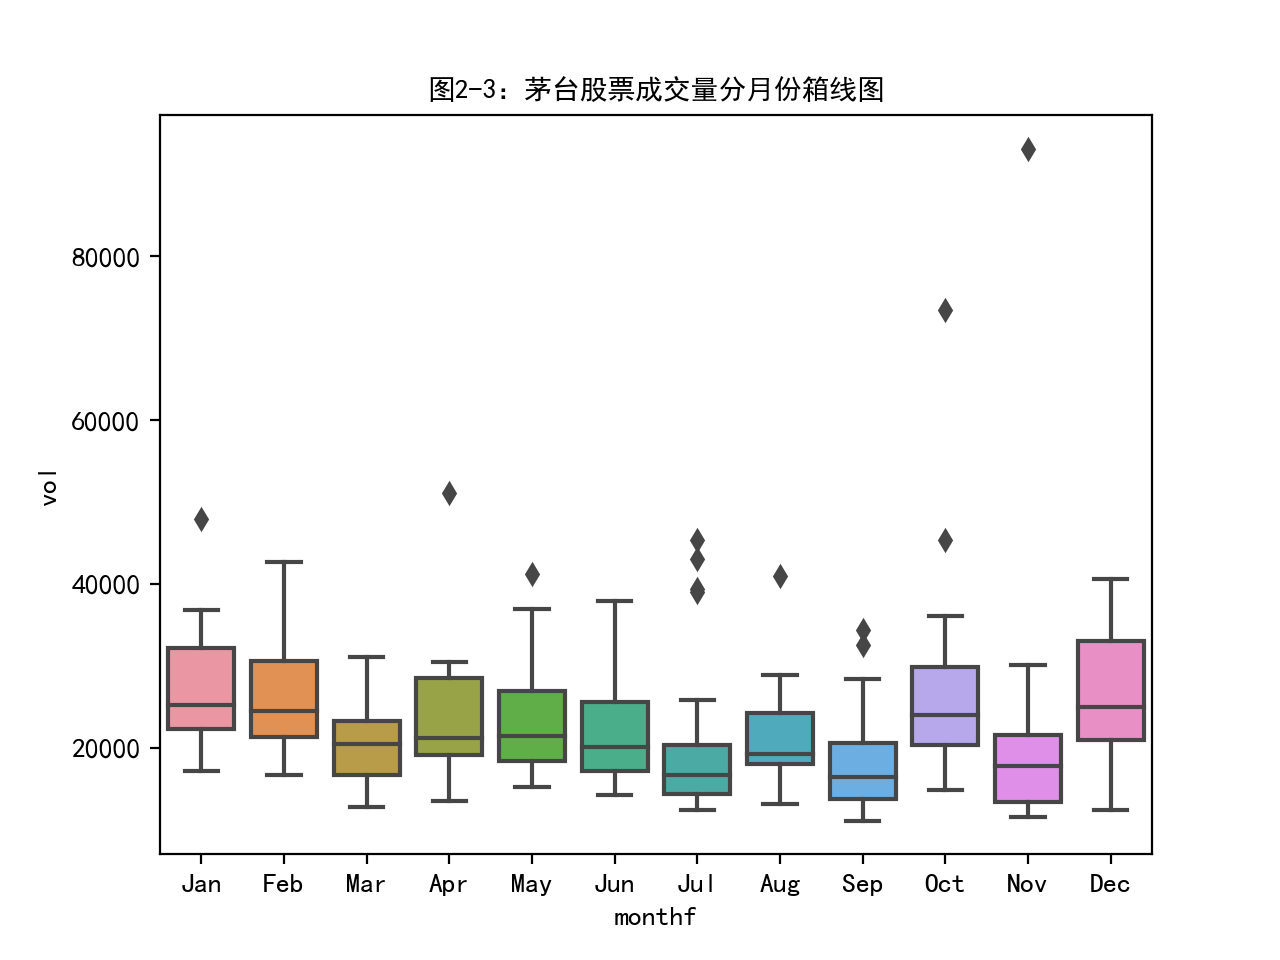

In [102]:
#画出分月份的成交量箱线图
sns.boxplot(x='monthf', y=df['vol'], data=df)
plt.title('图2-3：茅台股票成交量分月份箱线图', fontsize=10)

Text(0.5, 1.0, '图2-4：茅台股票成交额分月份箱线图')

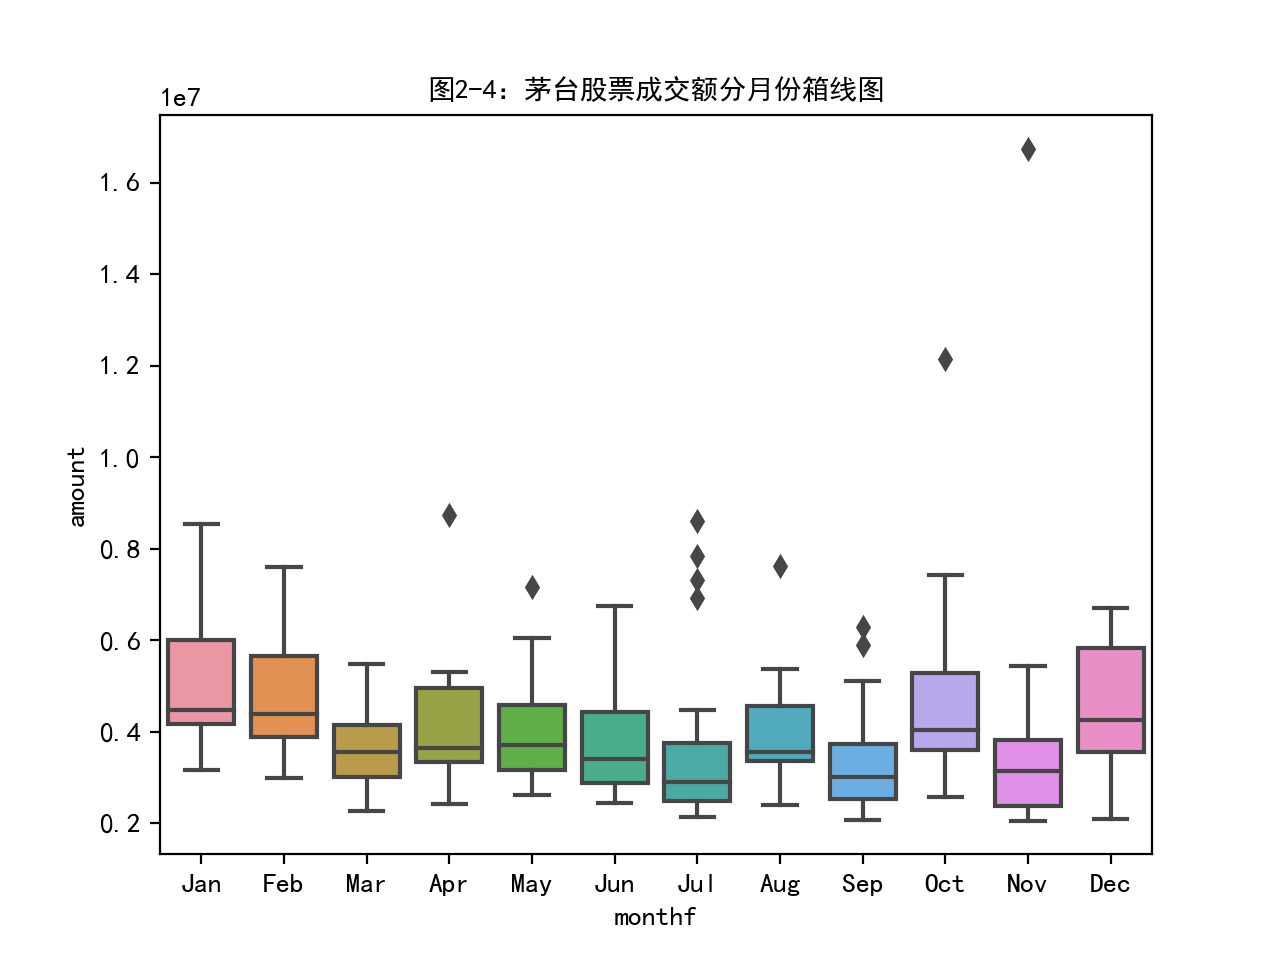

In [103]:
#画出分月份的成交额箱线图
sns.boxplot(x='monthf', y=df['amount'], data=df)
plt.title('图2-4：茅台股票成交额分月份箱线图', fontsize=10)

In [93]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,name,date,month,monthf
0,600519.SH,20230103,1731.20,1738.43,1706.01,1730.01,1727.00,3.01,0.1743,26033.80,4487760.231,贵州茅台,2023-01-03,1,Jan
1,600519.SH,20230104,1730.00,1738.70,1716.00,1725.01,1730.01,-5.00,-0.2890,20415.75,3523582.306,贵州茅台,2023-01-04,1,Jan
2,600519.SH,20230105,1737.00,1801.00,1733.00,1801.00,1725.01,75.99,4.4052,47942.85,8541587.089,贵州茅台,2023-01-05,1,Jan
3,600519.SH,20230106,1806.12,1811.90,1787.00,1803.77,1801.00,2.77,0.1538,24903.75,4480838.898,贵州茅台,2023-01-06,1,Jan
4,600519.SH,20230109,1835.00,1849.98,1807.82,1841.20,1803.77,37.43,2.0751,30977.23,5684181.147,贵州茅台,2023-01-09,1,Jan


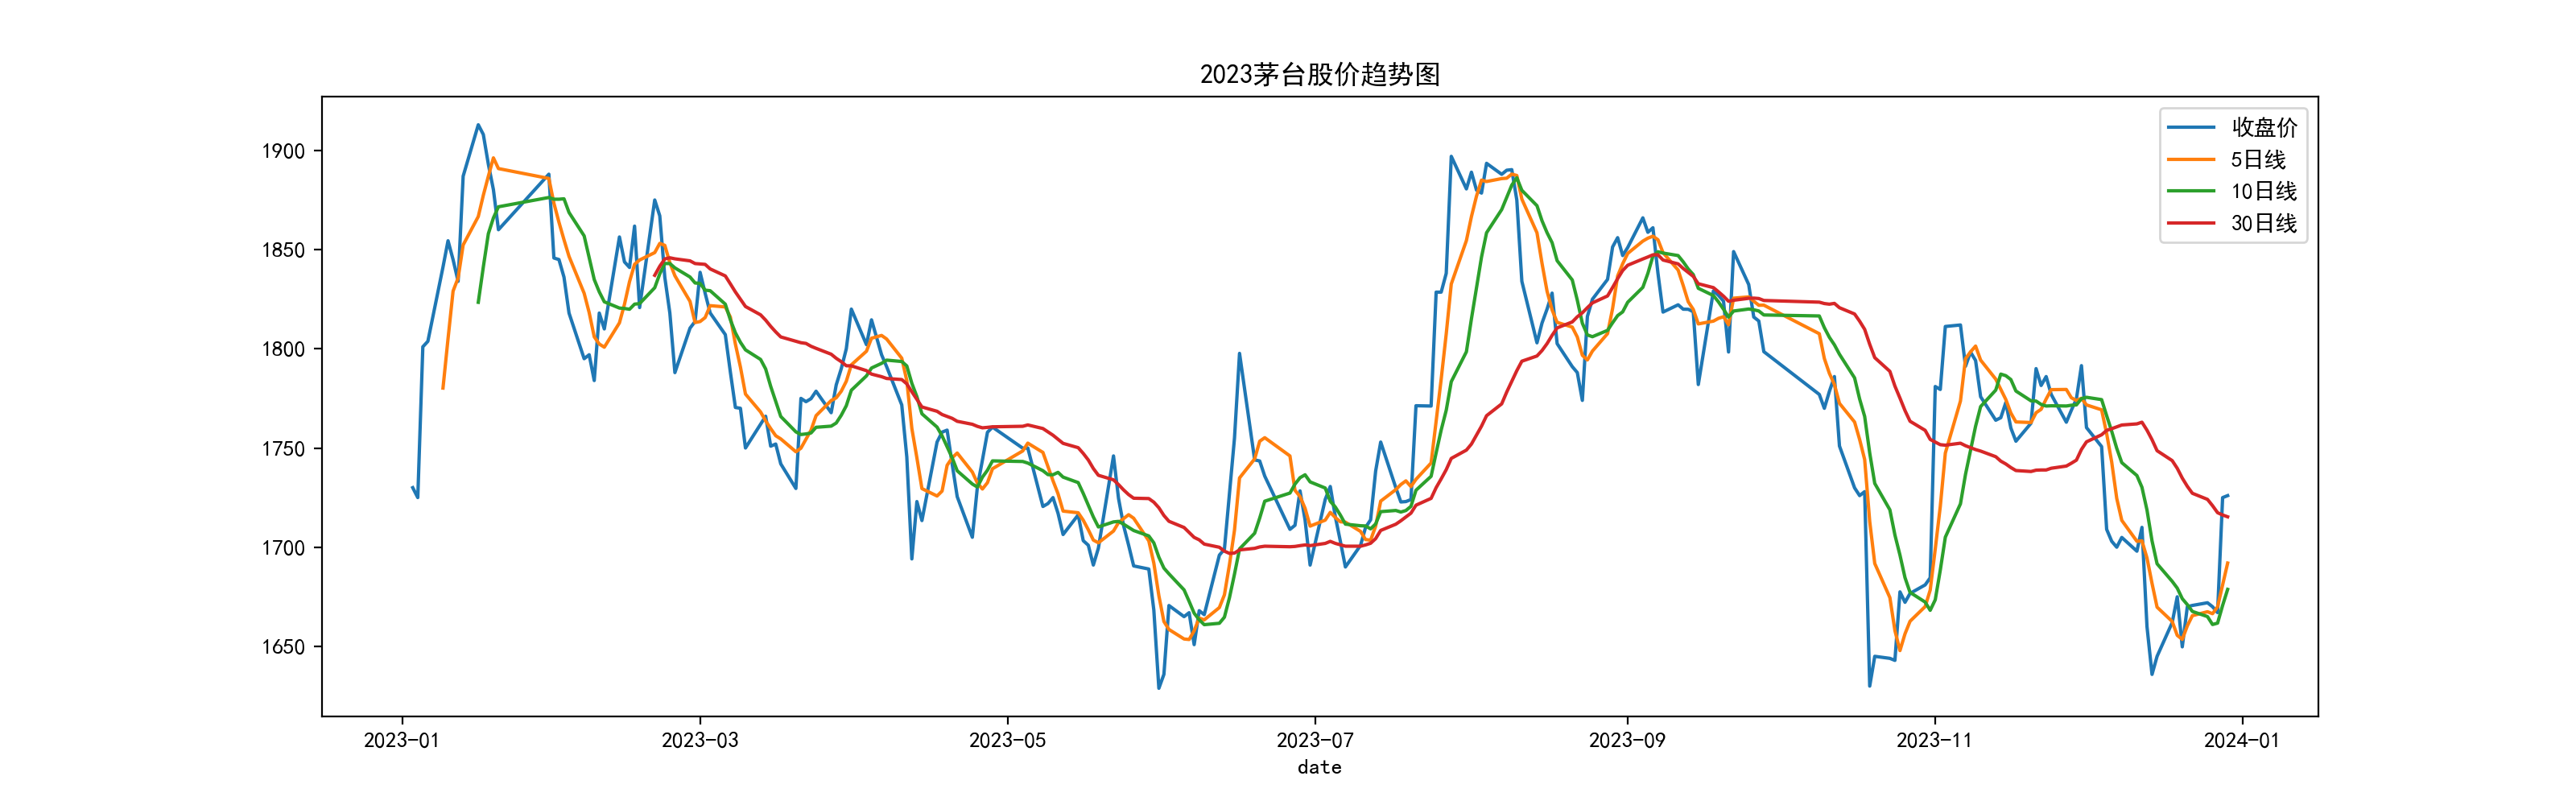

In [96]:
#画出5，10，30的均线
#生成三十日、六十日、九十日的均线图
df['thirty'] = df.close.rolling(window = 5).mean()
df['sisty'] = df.close.rolling(window = 10).mean()
df['ninety'] = df.close.rolling(window = 30).mean()

# 生成坐标轴并定义图表大小。
fig, ax = plt.subplots(figsize = (16,5))
# 使用循环生成４条折线
lst_col = ['close','thirty', 'sisty', 'ninety']
for c in lst_col:
    df \
        .loc[:, ['date', c]] \
        .set_index('date') \
        .plot(kind = 'line',
              ax = ax,
              title = '2023茅台股价趋势图')
# 更新标签
lst_led = ['收盘价','5日线', '10日线', '30日线']
ax.legend(lst_led)
plt.show()

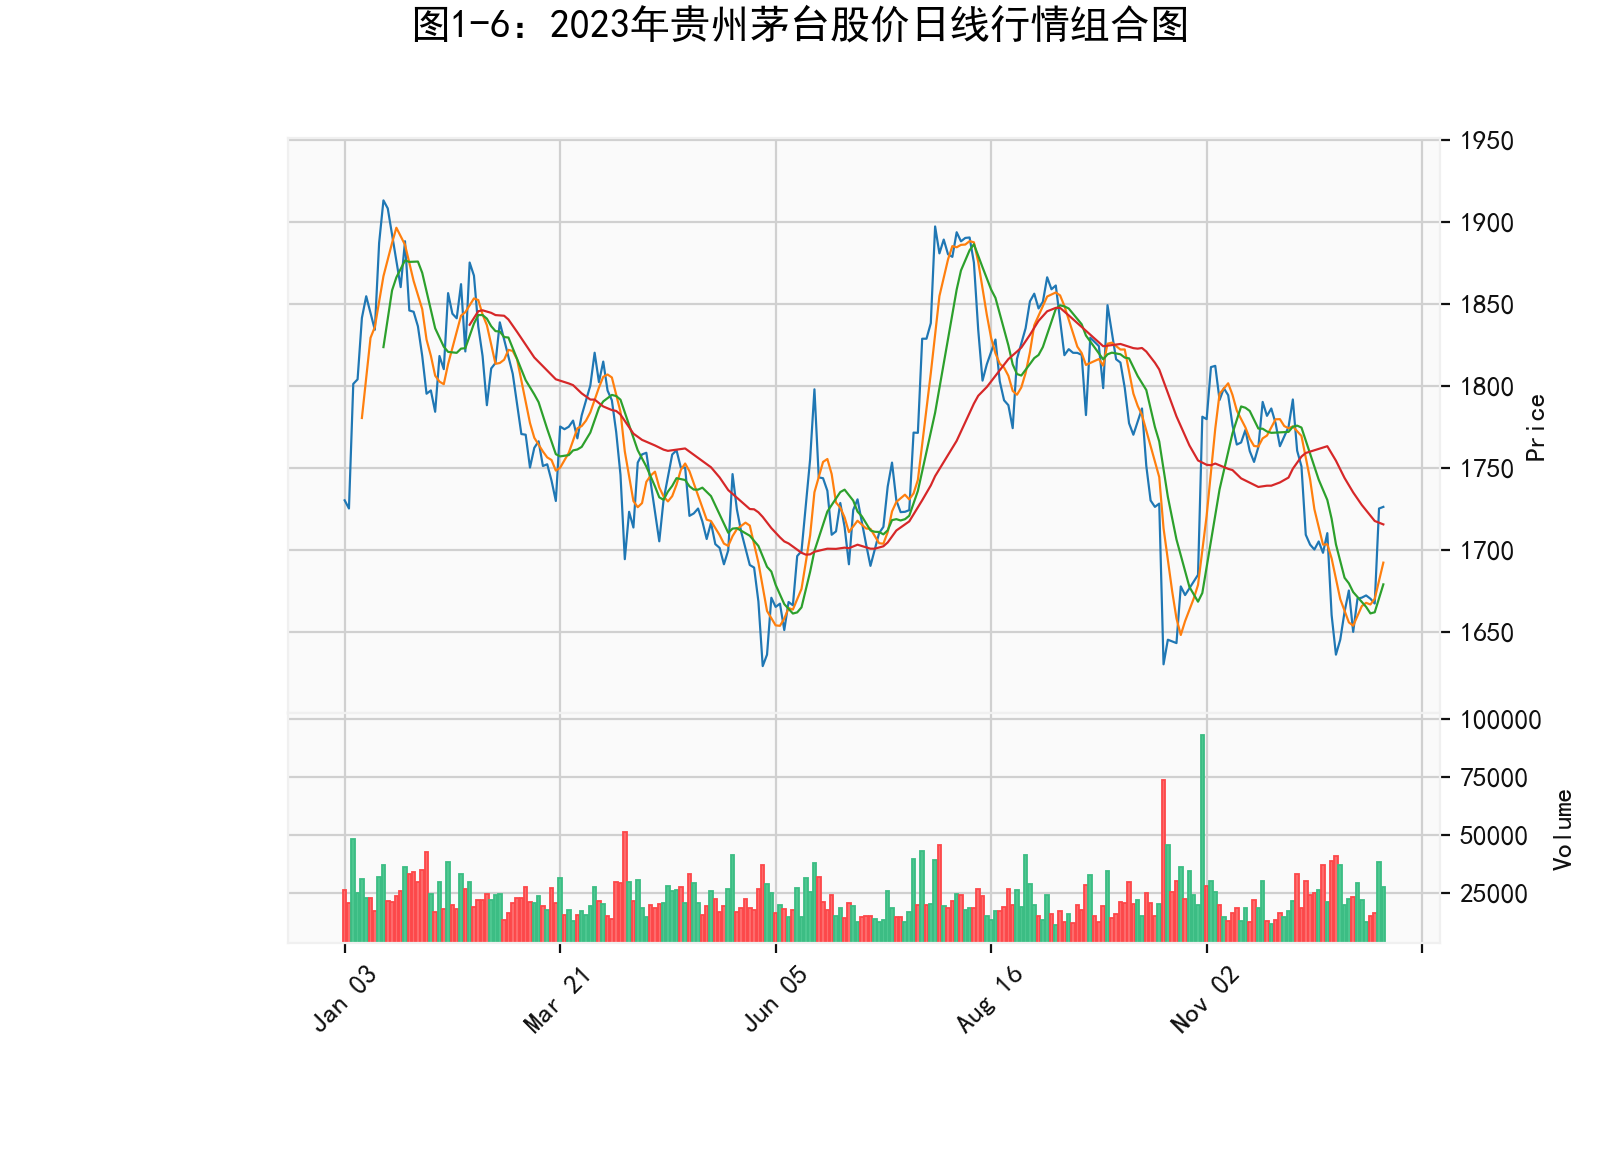

In [117]:
#引入mplfinance，绘制收盘价、均线、成交量的组合图
import mplfinance as mpf
df['date'] = pd.to_datetime(df['date'])
df1 = df.set_index('date',drop=True, append=False, inplace=False, verify_integrity=False)
df1 = df1.iloc[:,[2,3,4,5,9]]
df1.head()
df1['volume'] = df1['vol']
# 解决mplfinance绘制输出中文乱码
s = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': 'SimHei'})
mpf.plot(df1, type='line',mav=(5,10,30), volume=True,title='图1-6：2023年贵州茅台股价日线行情组合图',style=s)

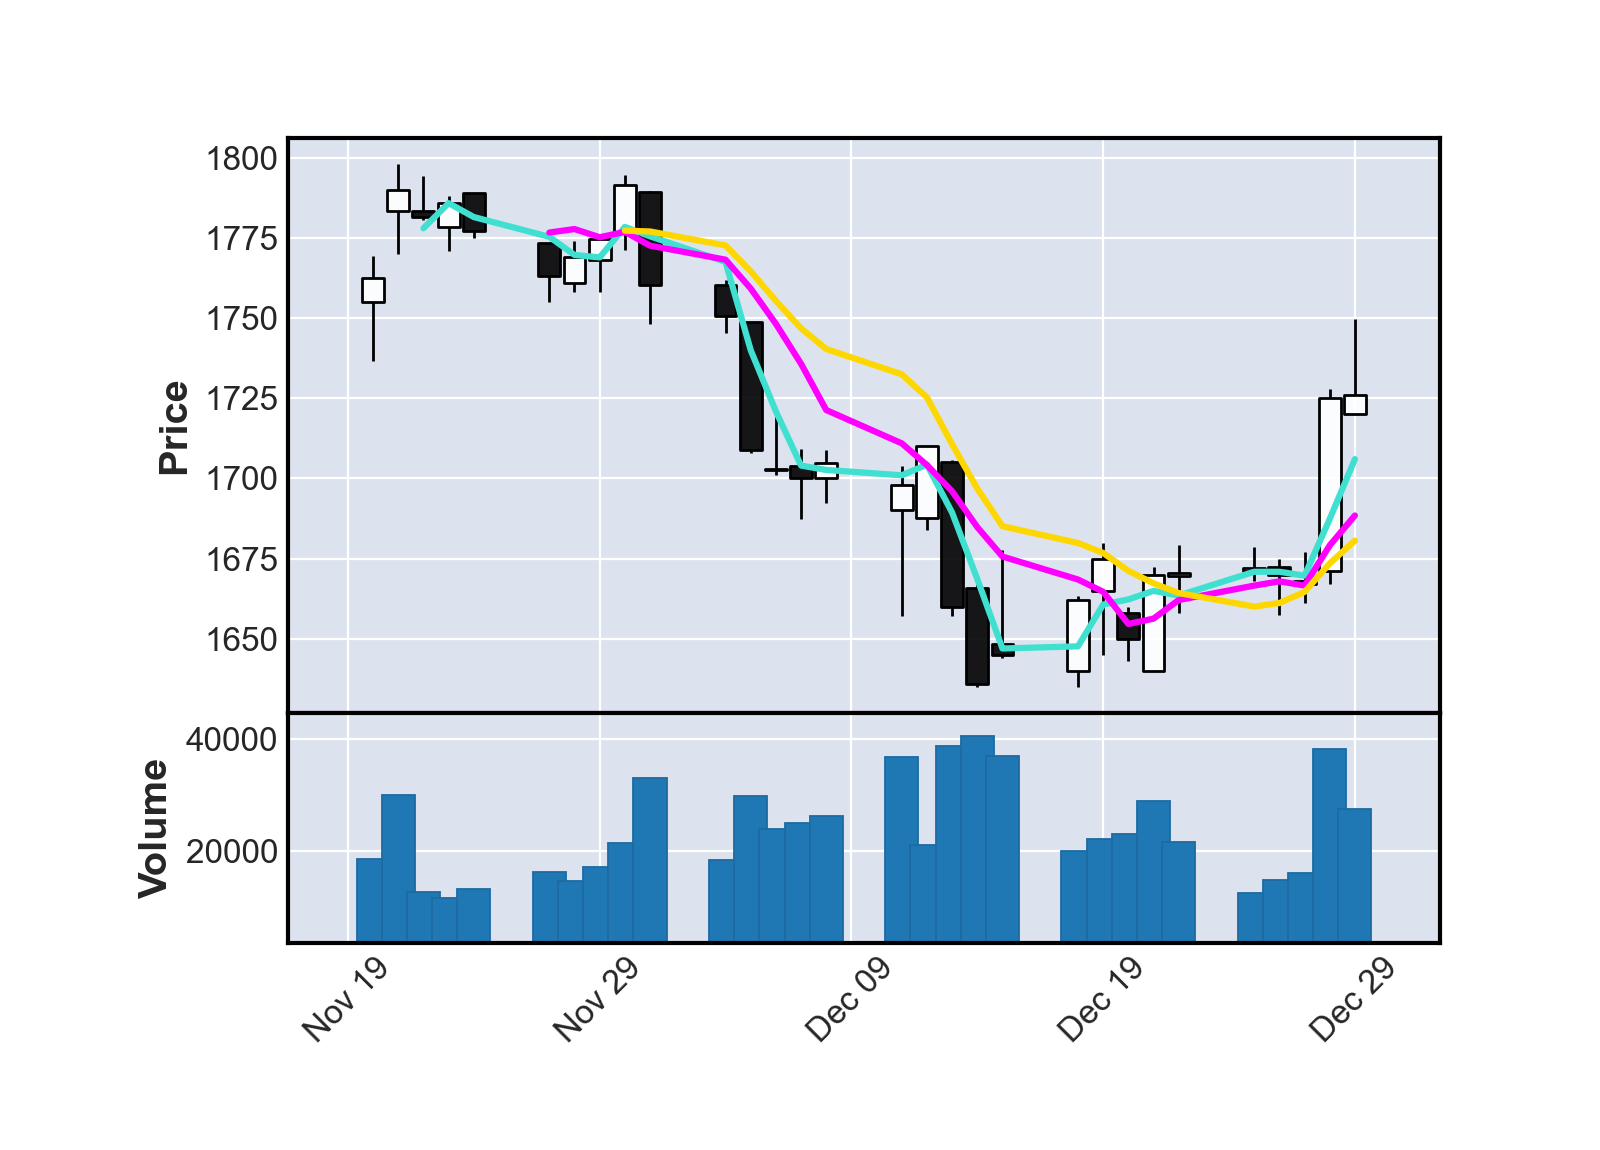

In [101]:
#绘制最后30天的K线图
mpf.plot(df1.tail(30),type='candle',mav = (3,6,9),show_nontrading=True, volume=True)
#白色表示涨，黑色表示跌

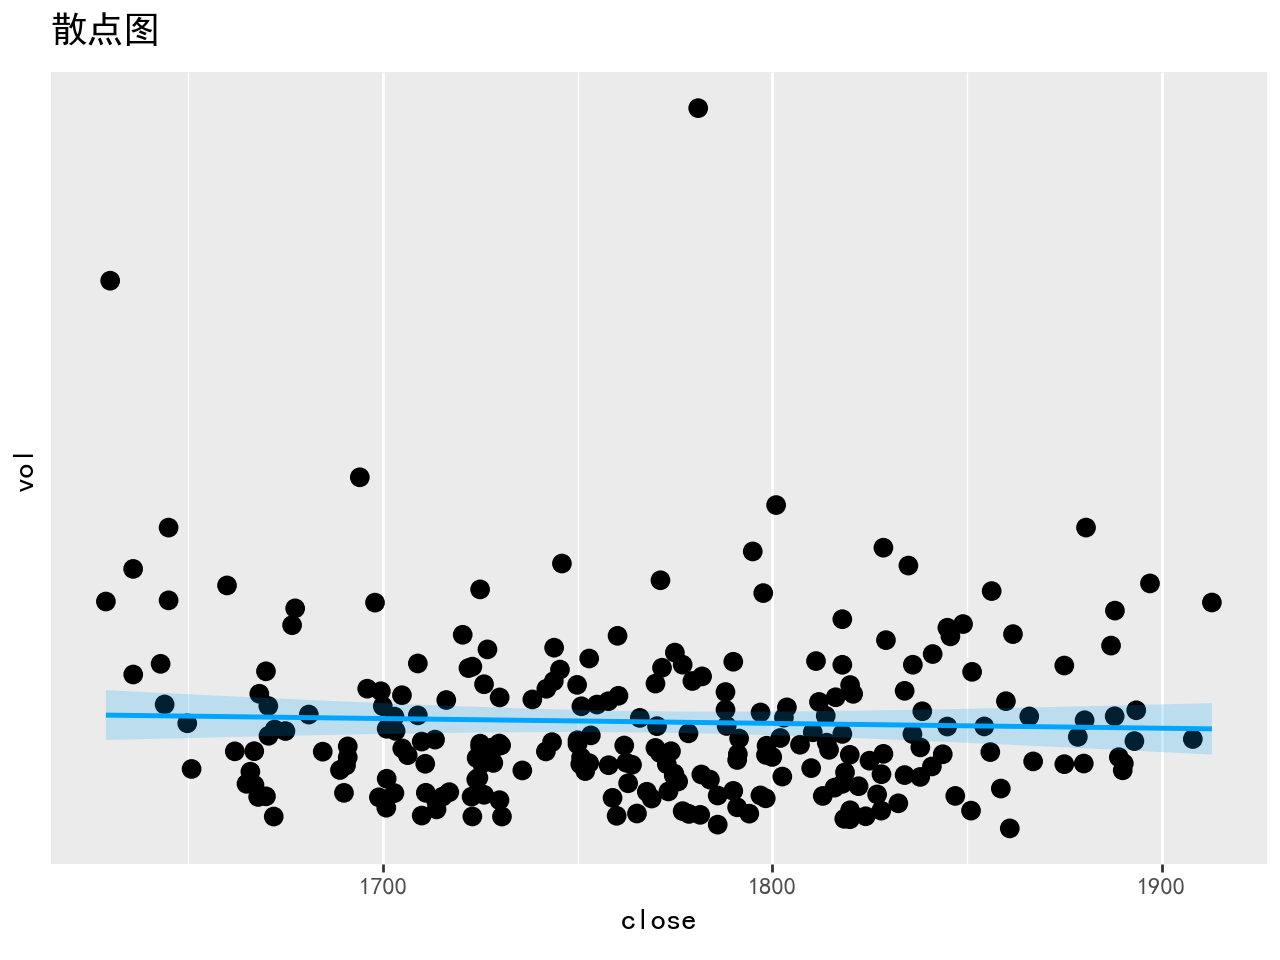

<Figure Size: (640 x 480)>

In [103]:
#画出收盘价与成交量的散点图
#根据相关系数的结果，对PM2.5关于PM10，CO进行拟合
import statsmodels.api as sm
(
    ggplot(df, aes('close', 'vol'))
    + geom_point(fill='k', color='k', size=3, shape='o')
    + geom_smooth(method='lm', span=0.55, se=True, color='#00A5FF', fill='#00A5FF', alpha=0.2)
    + scale_y_continuous(breaks = np.arange(0, 200, 50))
    +labs(title = "散点图") 
    + theme(text=element_text(family="SimHei"))
)

In [104]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,name,date,month,monthf,week,weekay,weekdayf,day,monthweek
0,600519.SH,20230103,1731.20,1738.43,1706.01,1730.01,1727.00,3.01,0.1743,26033.80,4487760.231,贵州茅台,2023-01-03,1,Jan,1,2,Tue,03,1
1,600519.SH,20230104,1730.00,1738.70,1716.00,1725.01,1730.01,-5.00,-0.2890,20415.75,3523582.306,贵州茅台,2023-01-04,1,Jan,1,3,Wed,04,1
2,600519.SH,20230105,1737.00,1801.00,1733.00,1801.00,1725.01,75.99,4.4052,47942.85,8541587.089,贵州茅台,2023-01-05,1,Jan,1,4,Thu,05,1
3,600519.SH,20230106,1806.12,1811.90,1787.00,1803.77,1801.00,2.77,0.1538,24903.75,4480838.898,贵州茅台,2023-01-06,1,Jan,1,5,Fri,06,1
4,600519.SH,20230109,1835.00,1849.98,1807.82,1841.20,1803.77,37.43,2.0751,30977.23,5684181.147,贵州茅台,2023-01-09,1,Jan,2,1,Mon,09,2


In [105]:
#画出相关系数图
df2 = df.iloc[:,[2,3,4,5,9,10]]
mat_corr=np.round(df2.corr(),1).reset_index()
mat_corr

,index,open,high,low,close,vol,amount
0,open,1.0,1.0,1.0,0.9,-0.0,0.1
1,high,1.0,1.0,1.0,1.0,0.0,0.1
2,low,1.0,1.0,1.0,1.0,-0.1,-0.0
3,close,0.9,1.0,1.0,1.0,-0.0,0.1
4,vol,-0.0,0.0,-0.1,-0.0,1.0,1.0
5,amount,0.1,0.1,-0.0,0.1,1.0,1.0


In [106]:
mydata=pd.melt(mat_corr,id_vars='index',var_name='var',value_name='value')
mydata['AbsValue']=np.abs(mydata.value)
mydata.head()

,index,var,value,AbsValue
0,open,open,1.0,1.0
1,high,open,1.0,1.0
2,low,open,1.0,1.0
3,close,open,0.9,0.9
4,vol,open,-0.0,0.0


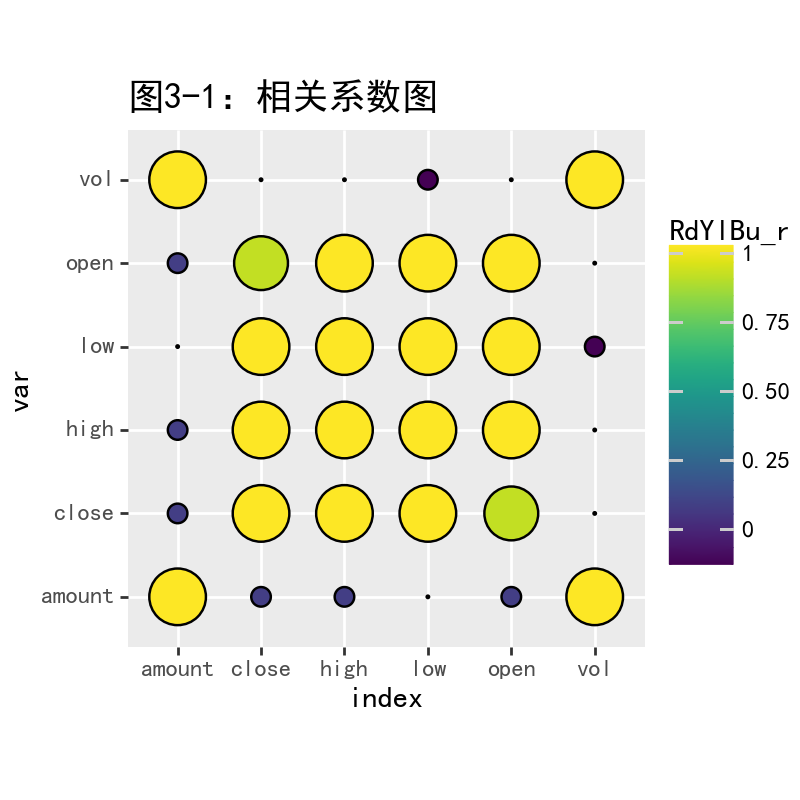

<Figure Size: (400 x 400)>

In [109]:
(
    ggplot(mydata, aes(x ='index', y ='var', fill = 'value',size='AbsValue')) +  
    geom_point(shape='o',color="black") +
    scale_size_area(max_size=11, guide=False) +
    scale_fill_cmap(name ='RdYlBu_r')+
    coord_equal()+
    theme(dpi=100,figure_size=(4,4))
    +labs(title = "图3-1：相关系数图") 
    + theme(text=element_text(family="SimHei"))
)

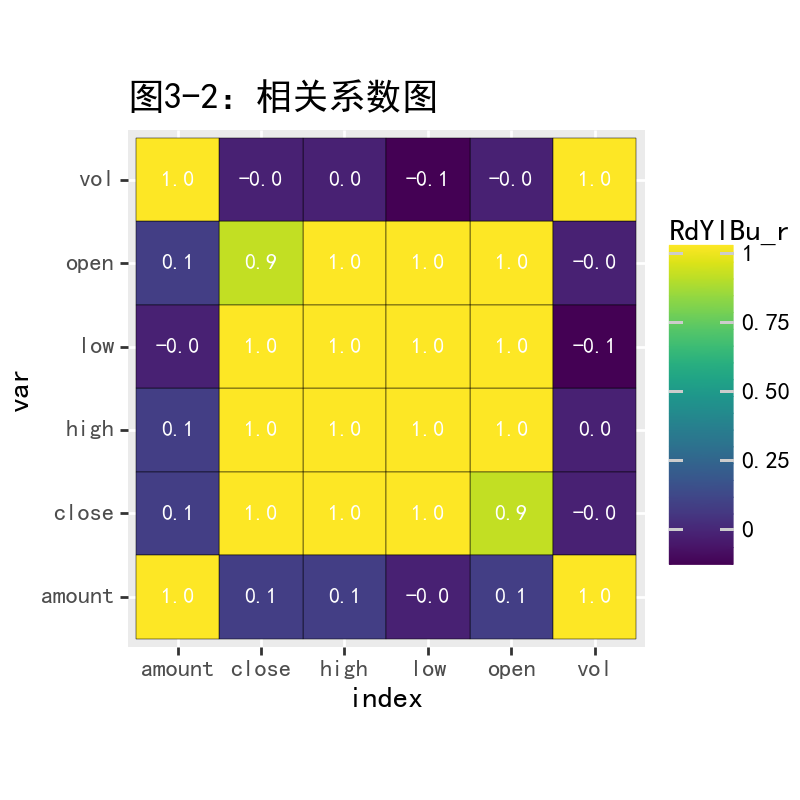

<Figure Size: (400 x 400)>

In [110]:
(
    ggplot(mydata, aes(x='index', y='var', fill='value')) +  
    geom_tile(color="black") +
    geom_text(aes(label='value'), size=8,colour="white")+
    scale_fill_cmap(name ='RdYlBu_r')+
    coord_equal()+
    theme(dpi=100,figure_size=(4,4))
    +labs(title = "图3-2：相关系数图") 
    + theme(text=element_text(family="SimHei"))
)

In [121]:
#进行行业对比，读取茅台五粮液、洋河股份、泸州老窖、山西汾酒、古井贡酒的2023年股价数据
df = pd.read_csv('2023年部分白酒业上市公司股价日线行情.csv')
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,name
0,600809.SH,20230103,284.21,284.21,272.00,275.84,284.99,-9.15,-3.2106,72342.10,1990649.136,山西汾酒
1,600519.SH,20230103,1731.20,1738.43,1706.01,1730.01,1727.00,3.01,0.1743,26033.80,4487760.231,贵州茅台
2,002304.SZ,20230103,160.01,160.23,155.71,157.13,160.50,-3.37,-2.0997,62158.01,976852.732,洋河股份
3,000858.SZ,20230103,181.00,181.81,176.51,178.20,180.69,-2.49,-1.3781,182062.04,3240728.572,五粮液
4,000596.SZ,20230103,266.90,267.87,260.34,263.45,266.90,-3.45,-1.2926,17990.50,473175.770,古井贡酒


In [122]:
#更改日期格式，生成日列和月列
df['trade_date'] = df['trade_date'].astype(str)
date_time_objects = [datetime.strptime(date_string, '%Y%m%d').date() for date_string in df['trade_date']]
df['date'] = date_time_objects
df['month']=[d.month for d in df['date']]
df['day']=[d.strftime('%d') for d in df['date']]
df.head(10)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,name,date,month,day
0,600809.SH,20230103,284.21,284.21,272.00,275.84,284.99,-9.15,-3.2106,72342.10,1990649.136,山西汾酒,2023-01-03,1,03
1,600519.SH,20230103,1731.20,1738.43,1706.01,1730.01,1727.00,3.01,0.1743,26033.80,4487760.231,贵州茅台,2023-01-03,1,03
2,002304.SZ,20230103,160.01,160.23,155.71,157.13,160.50,-3.37,-2.0997,62158.01,976852.732,洋河股份,2023-01-03,1,03
3,000858.SZ,20230103,181.00,181.81,176.51,178.20,180.69,-2.49,-1.3781,182062.04,3240728.572,五粮液,2023-01-03,1,03
4,000596.SZ,20230103,266.90,267.87,260.34,263.45,266.90,-3.45,-1.2926,17990.50,473175.770,古井贡酒,2023-01-03,1,03
5,000568.SZ,20230103,224.00,225.28,217.79,219.86,224.28,-4.42,-1.9708,92381.52,2030869.788,泸州老窖,2023-01-03,1,03
6,600809.SH,20230104,275.79,277.93,272.40,276.00,275.84,0.16,0.0580,32210.12,887858.688,山西汾酒,2023-01-04,1,04
7,600519.SH,20230104,1730.00,1738.70,1716.00,1725.01,1730.01,-5.00,-0.2890,20415.75,3523582.306,贵州茅台,2023-01-04,1,04
8,002304.SZ,20230104,156.51,159.51,155.00,157.70,157.13,0.57,0.3628,45102.57,711257.302,洋河股份,2023-01-04,1,04
9,000858.SZ,20230104,178.00,180.50,176.30,178.62,178.20,0.42,0.2357,128835.84,2299619.966,五粮液,2023-01-04,1,04


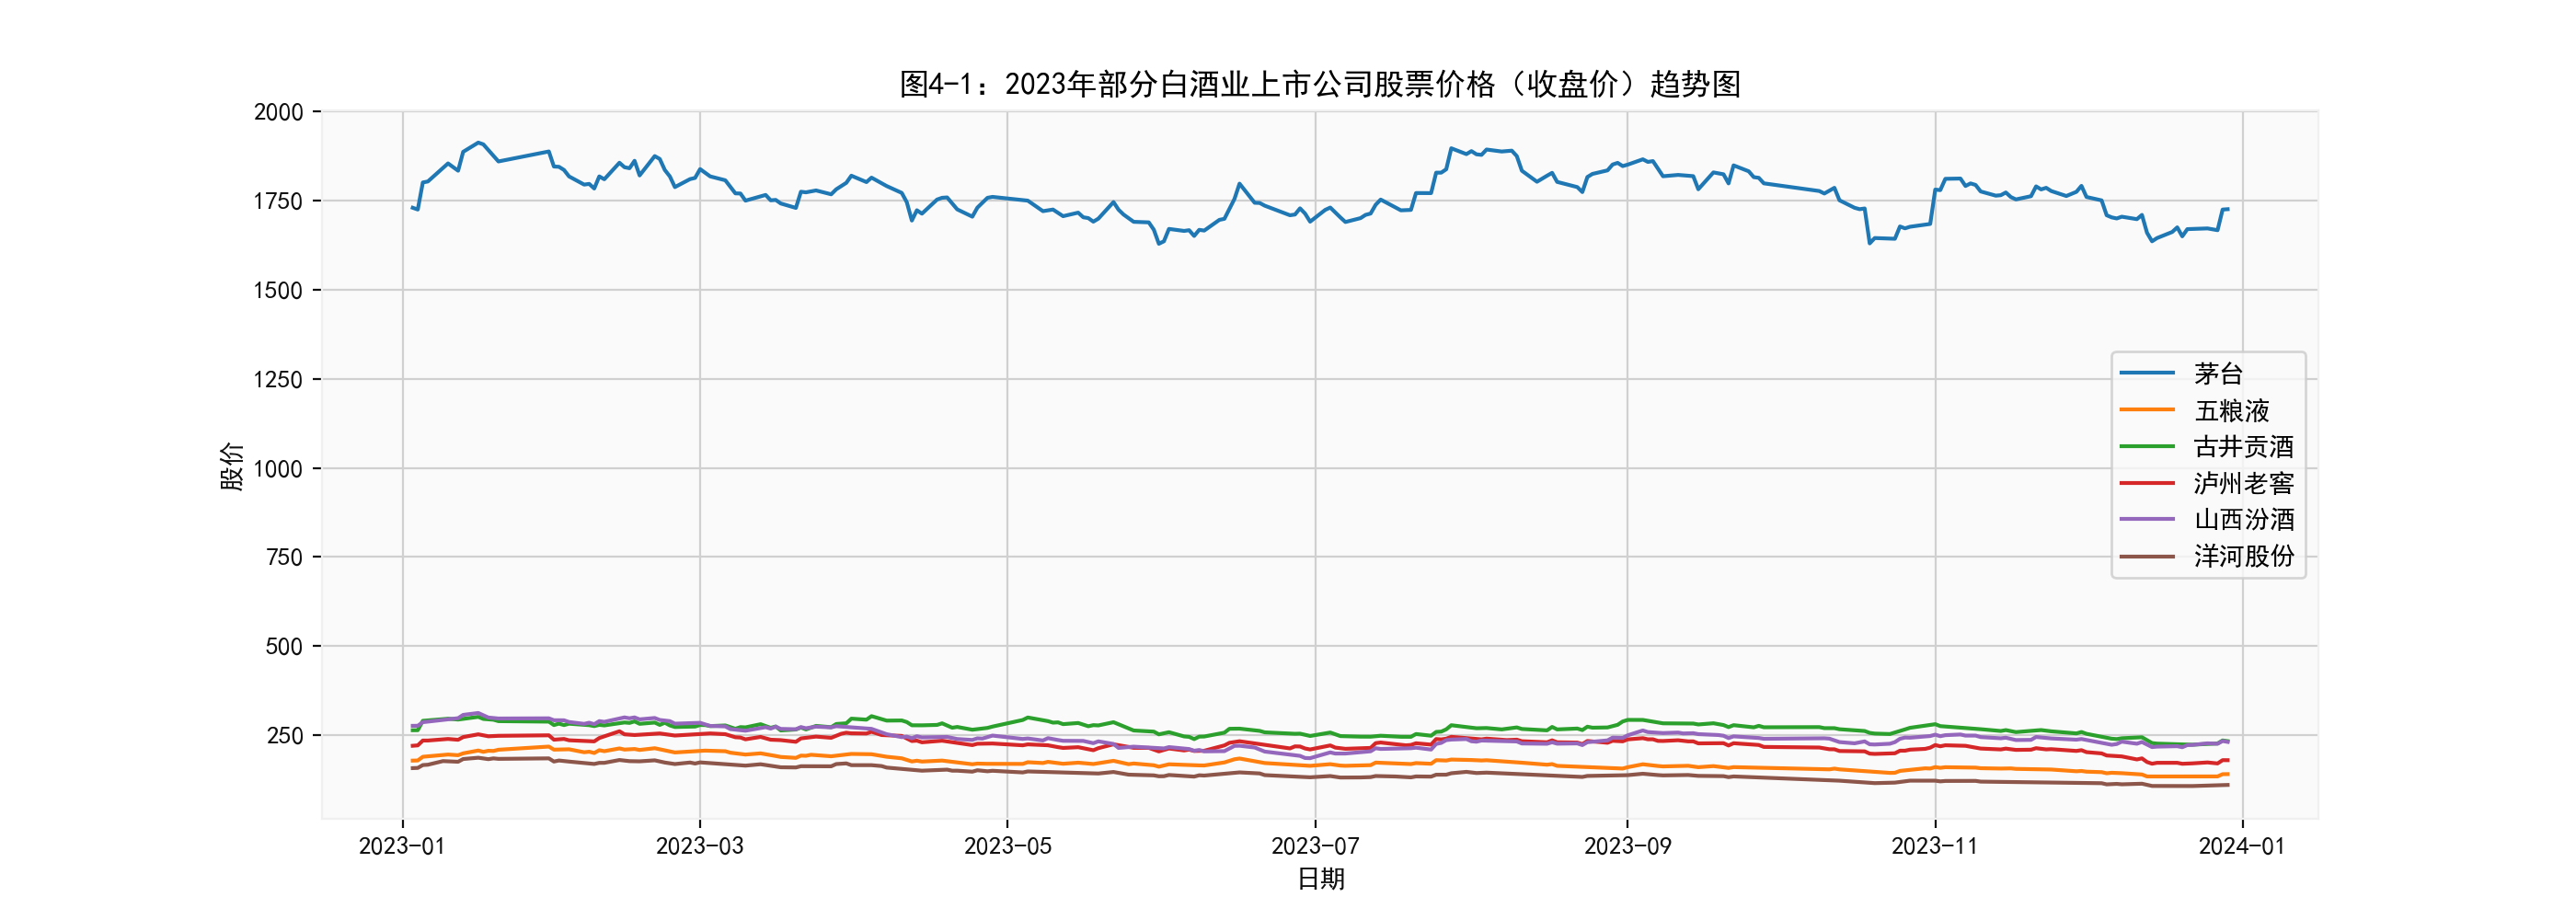

In [127]:
def plot_df(df, x, y1, y2, y3, y4, y5, y6, title="", xlabel='日期', ylabel='股价', dpi=100):
    plt.figure(figsize=(14, 5), dpi=dpi)
    plt.plot(x, y1, label='茅台')
    plt.plot(x, y2, label='五粮液')
    plt.plot(x, y3, label='古井贡酒')
    plt.plot(x, y4, label='泸州老窖')
    plt.plot(x, y5, label='山西汾酒')
    plt.plot(x, y6, label='洋河股份')
    plt.title(title, fontsize=50)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()

# 调用 plot_df 函数
plot_df(df, x=df[df['name']=='贵州茅台']['date'], y1=df[df['name']=='贵州茅台']['close'], y2=df[df['name']=='五粮液']['close'],\
        y3=df[df['name']=='古井贡酒']['close'],y4=df[df['name']=='泸州老窖']['close'],y5=df[df['name']=='山西汾酒']['close'],\
        y6=df[df['name']=='洋河股份']['close'],title='图4-1：2023年部分白酒业上市公司股票价格（收盘价）趋势图')

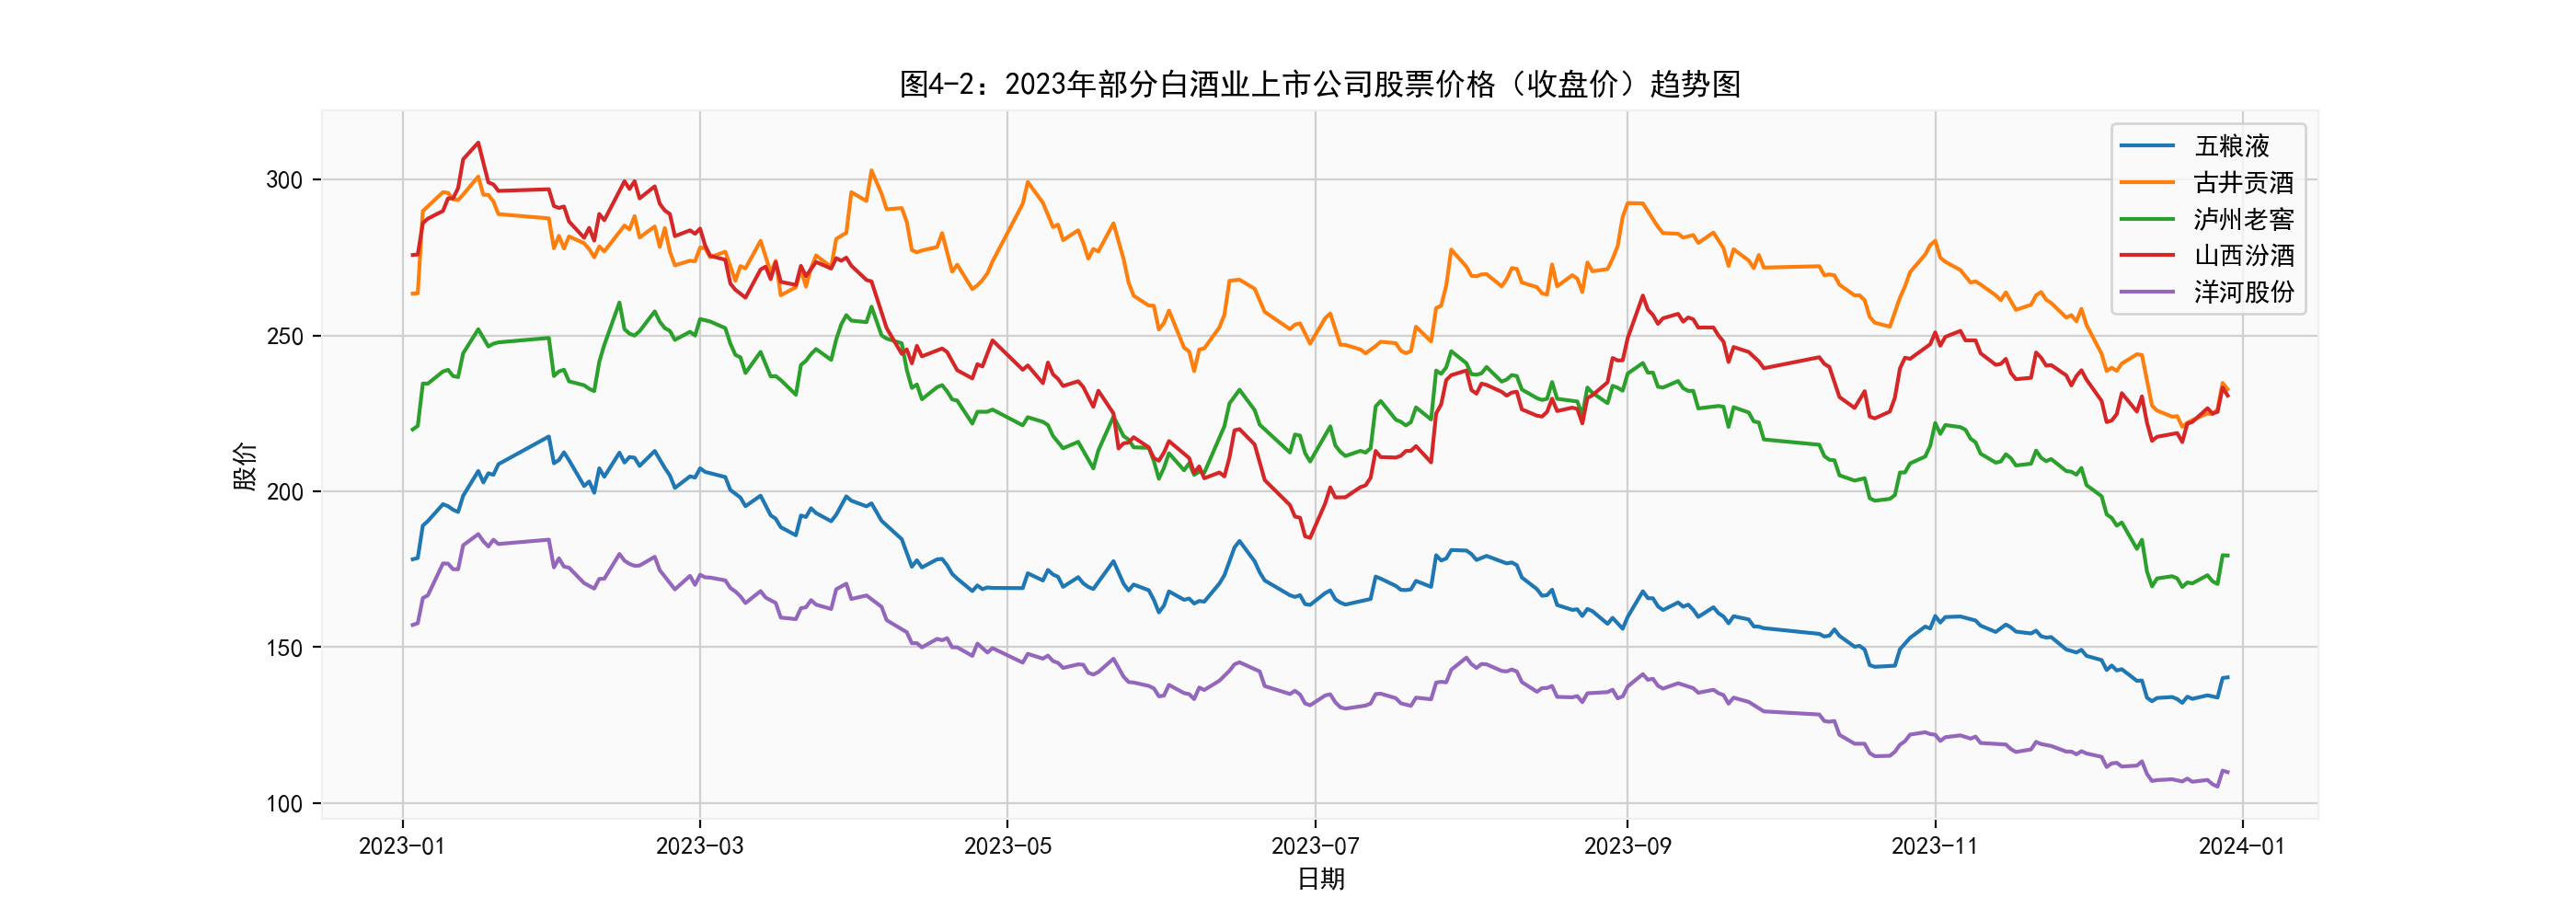

In [126]:
def plot_df(df, x, y2, y3, y4, y5, y6, title="", xlabel='日期', ylabel='股价', dpi=100):
    plt.figure(figsize=(14, 5), dpi=dpi)
    plt.plot(x, y2, label='五粮液')
    plt.plot(x, y3, label='古井贡酒')
    plt.plot(x, y4, label='泸州老窖')
    plt.plot(x, y5, label='山西汾酒')
    plt.plot(x, y6, label='洋河股份')
    plt.title(title, fontsize=50)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()

# 调用 plot_df 函数
plot_df(df, x=df[df['name']=='贵州茅台']['date'], y2=df[df['name']=='五粮液']['close'],\
        y3=df[df['name']=='古井贡酒']['close'],y4=df[df['name']=='泸州老窖']['close'],y5=df[df['name']=='山西汾酒']['close'],\
        y6=df[df['name']=='洋河股份']['close'],title='图4-2：2023年部分白酒业上市公司股票价格（收盘价）趋势图')

Text(0.5, 1.0, '图5-1：五粮液股价（收盘价）分月份箱线图')

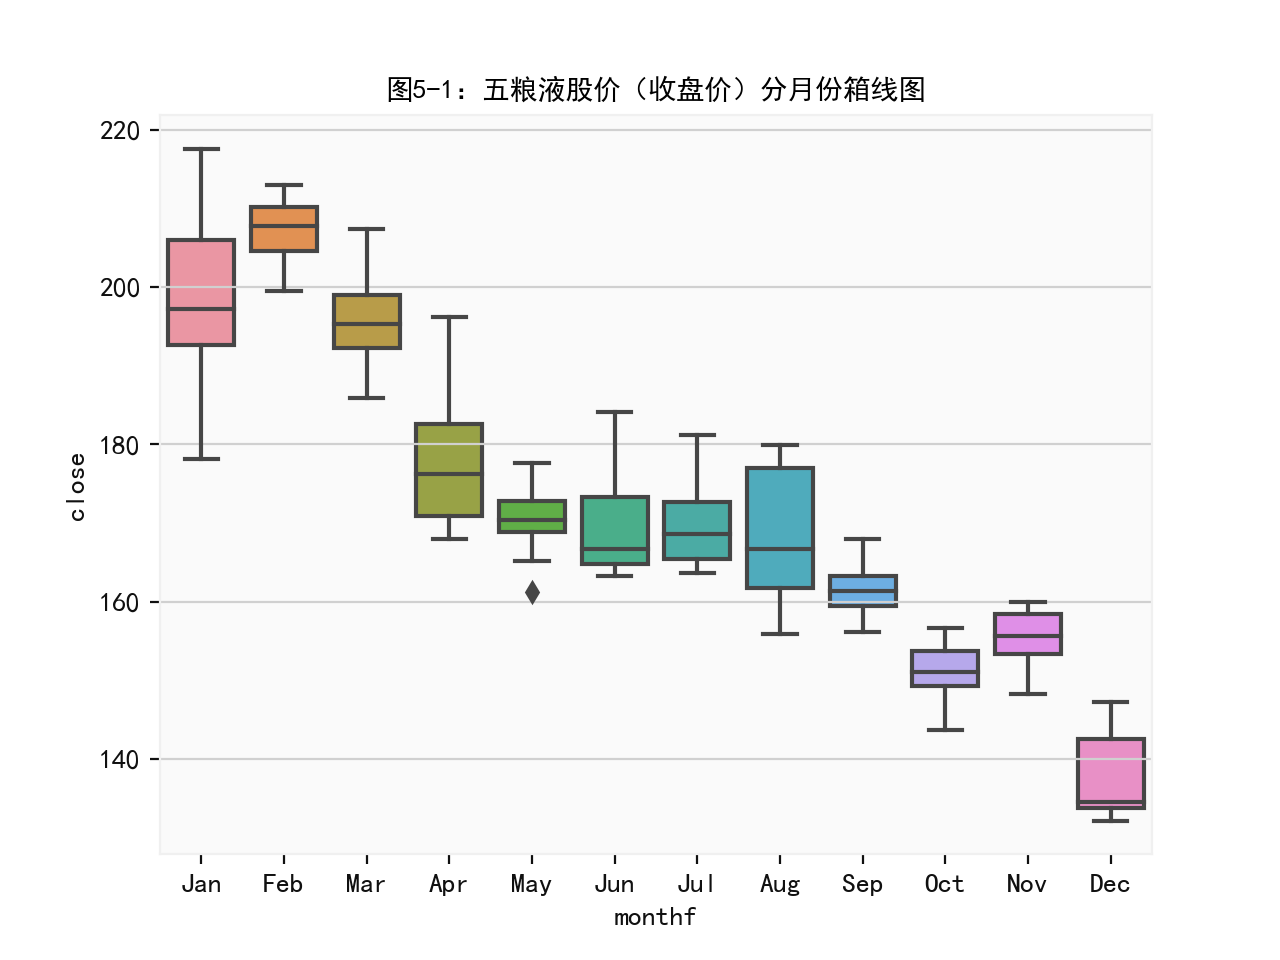

In [129]:
#画出分月份的收盘价箱线图
df['monthf']=df['month'].replace(np.arange(1,13,1), month_label)#进行替换
sns.boxplot(x=df[df['name']=='五粮液']['monthf'], y=df[df['name']=='五粮液']['close'])
plt.title('图5-1：五粮液股价（收盘价）分月份箱线图', fontsize=10)

Text(0.5, 1.0, '图5-2：洋河股份股价（收盘价）分月份箱线图')

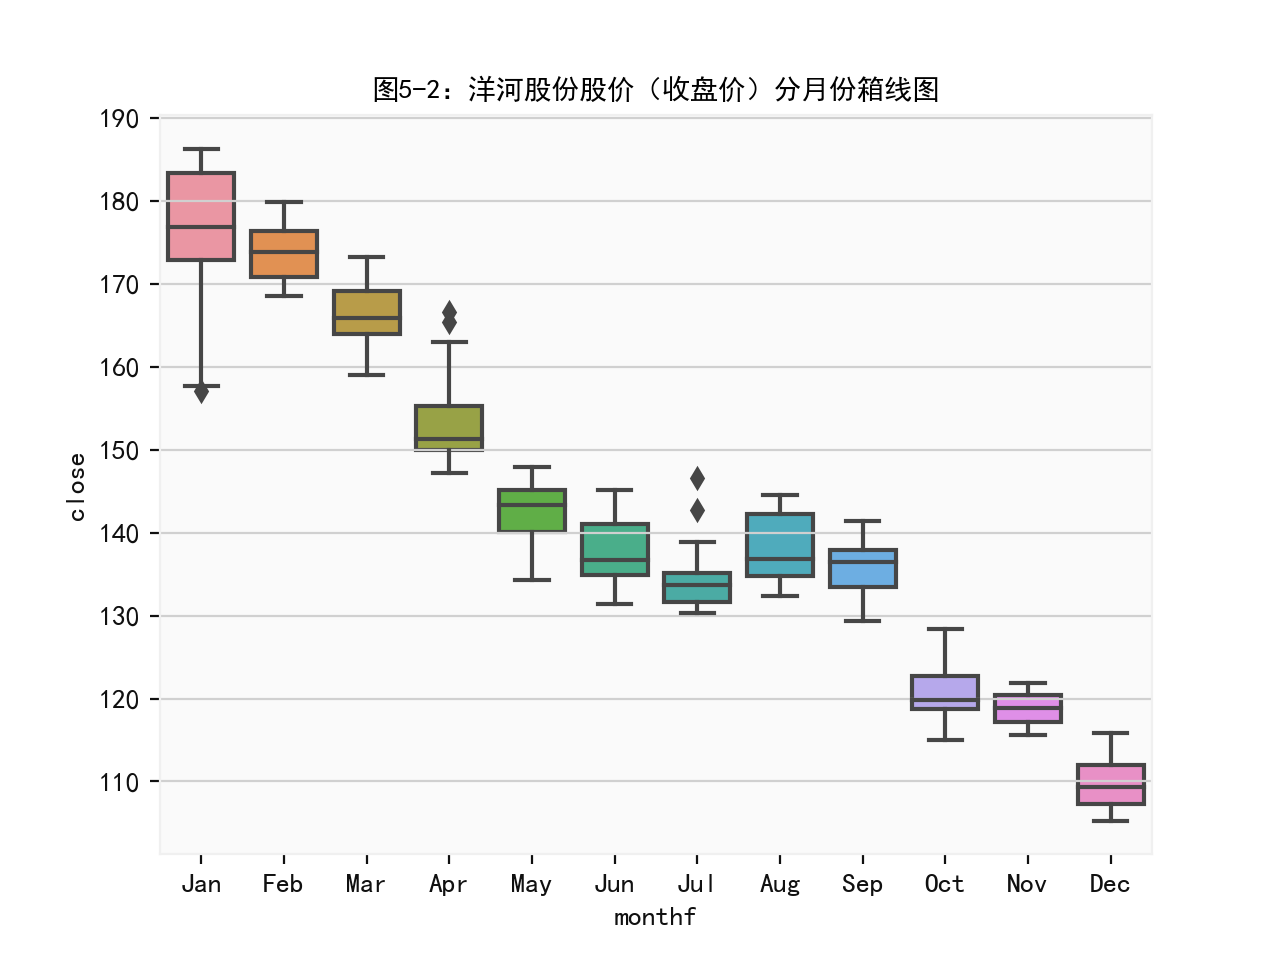

In [131]:
#画出分月份的收盘价箱线图
df['monthf']=df['month'].replace(np.arange(1,13,1), month_label)#进行替换
sns.boxplot(x=df[df['name']=='洋河股份']['monthf'], y=df[df['name']=='洋河股份']['close'])
plt.title('图5-2：洋河股份股价（收盘价）分月份箱线图', fontsize=10)

Text(0.5, 1.0, '图5-5：山西汾酒股价（收盘价）分月份箱线图')

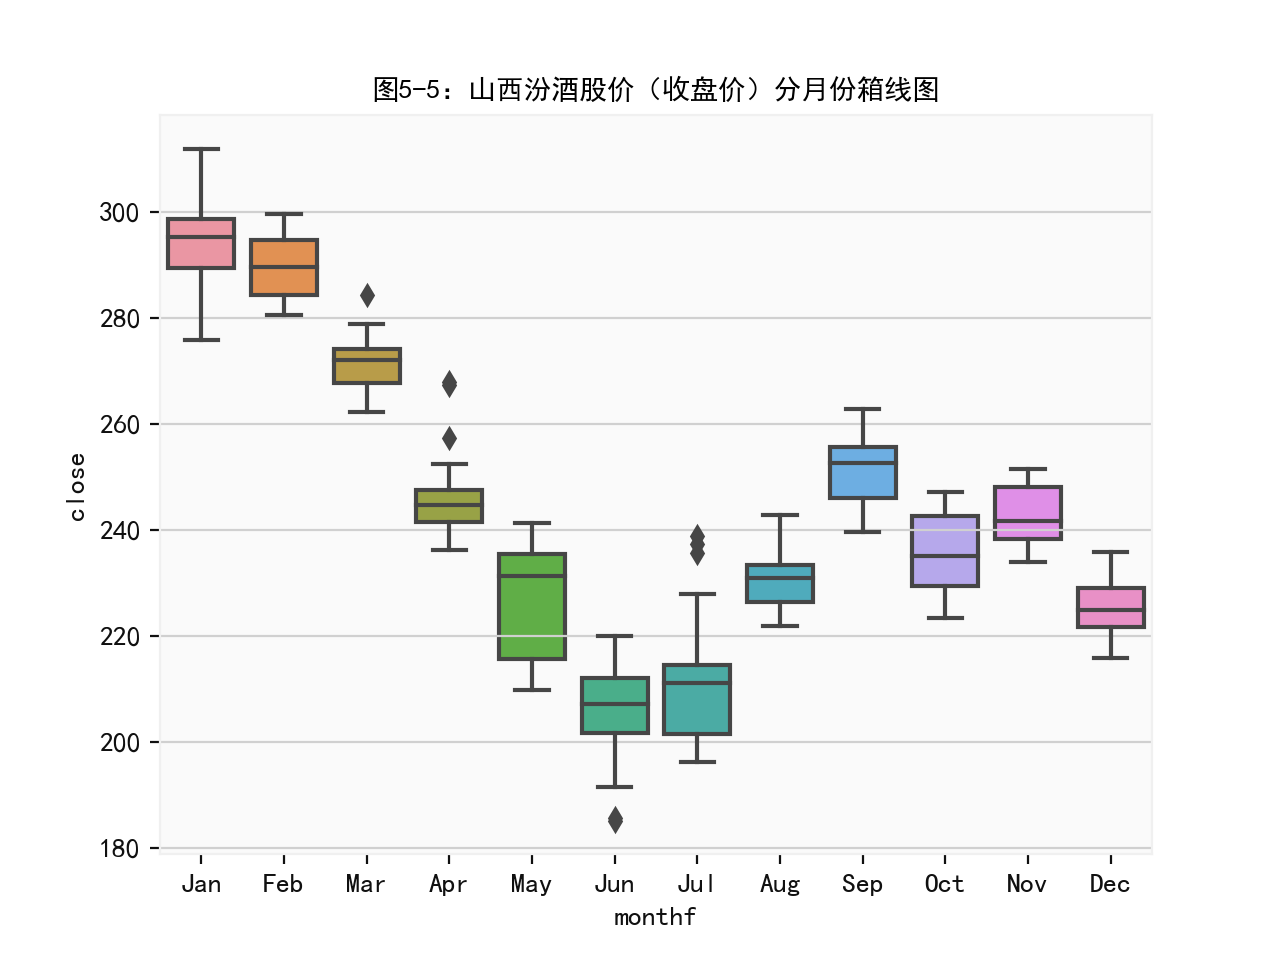

In [135]:
#画出分月份的收盘价箱线图
df['monthf']=df['month'].replace(np.arange(1,13,1), month_label)#进行替换
sns.boxplot(x=df[df['name']=='山西汾酒']['monthf'], y=df[df['name']=='山西汾酒']['close'])
plt.title('图5-5：山西汾酒股价（收盘价）分月份箱线图', fontsize=10)

Text(0.5, 1.0, '图5-3：泸州老窖股价（收盘价）分月份箱线图')

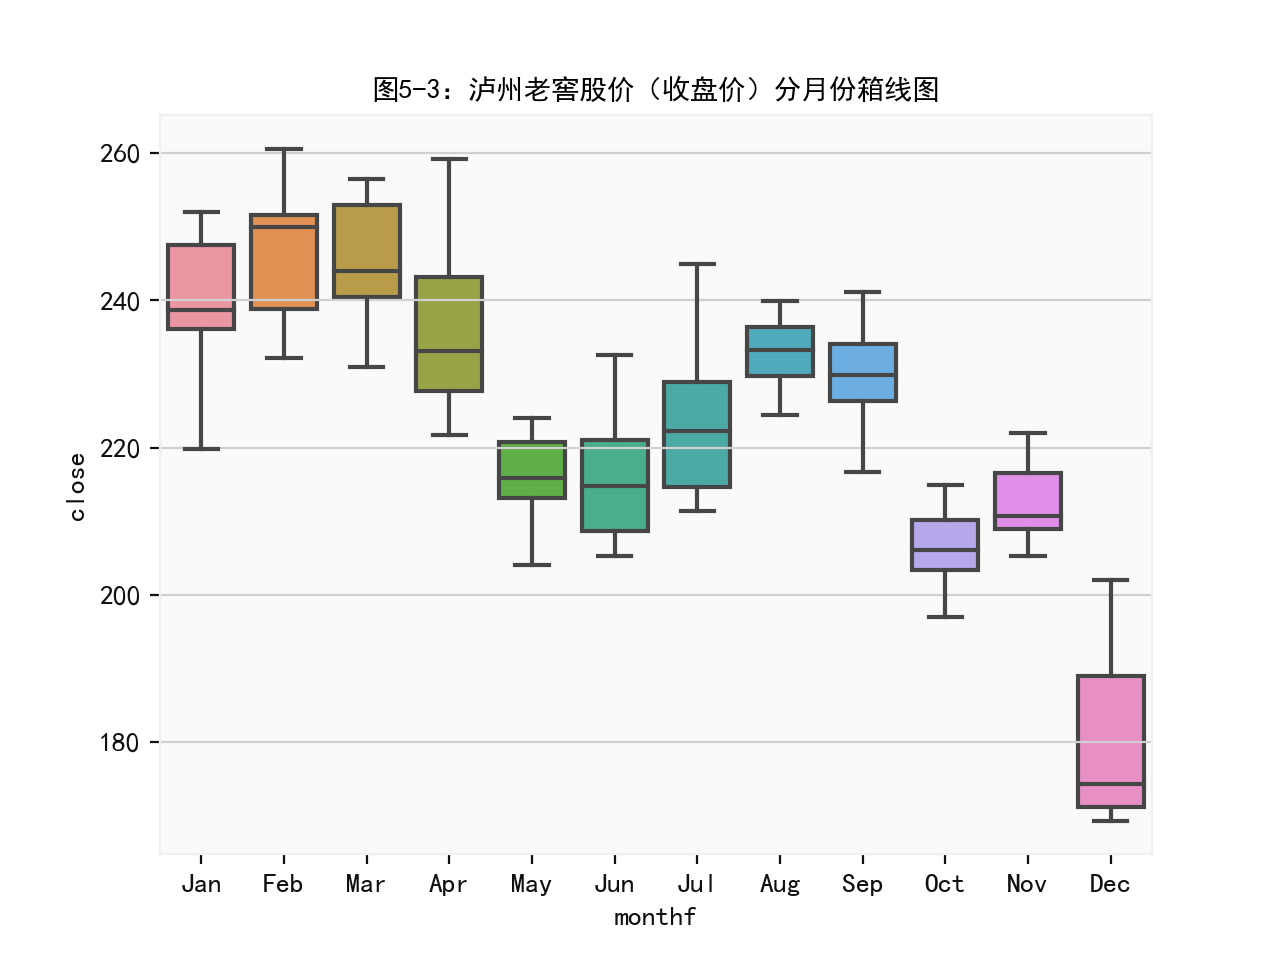

In [137]:
#画出分月份的收盘价箱线图
df['monthf']=df['month'].replace(np.arange(1,13,1), month_label)#进行替换
sns.boxplot(x=df[df['name']=='泸州老窖']['monthf'], y=df[df['name']=='泸州老窖']['close'])
plt.title('图5-3：泸州老窖股价（收盘价）分月份箱线图', fontsize=10)

Text(0.5, 1.0, '图5-4：古井贡酒股价（收盘价）分月份箱线图')

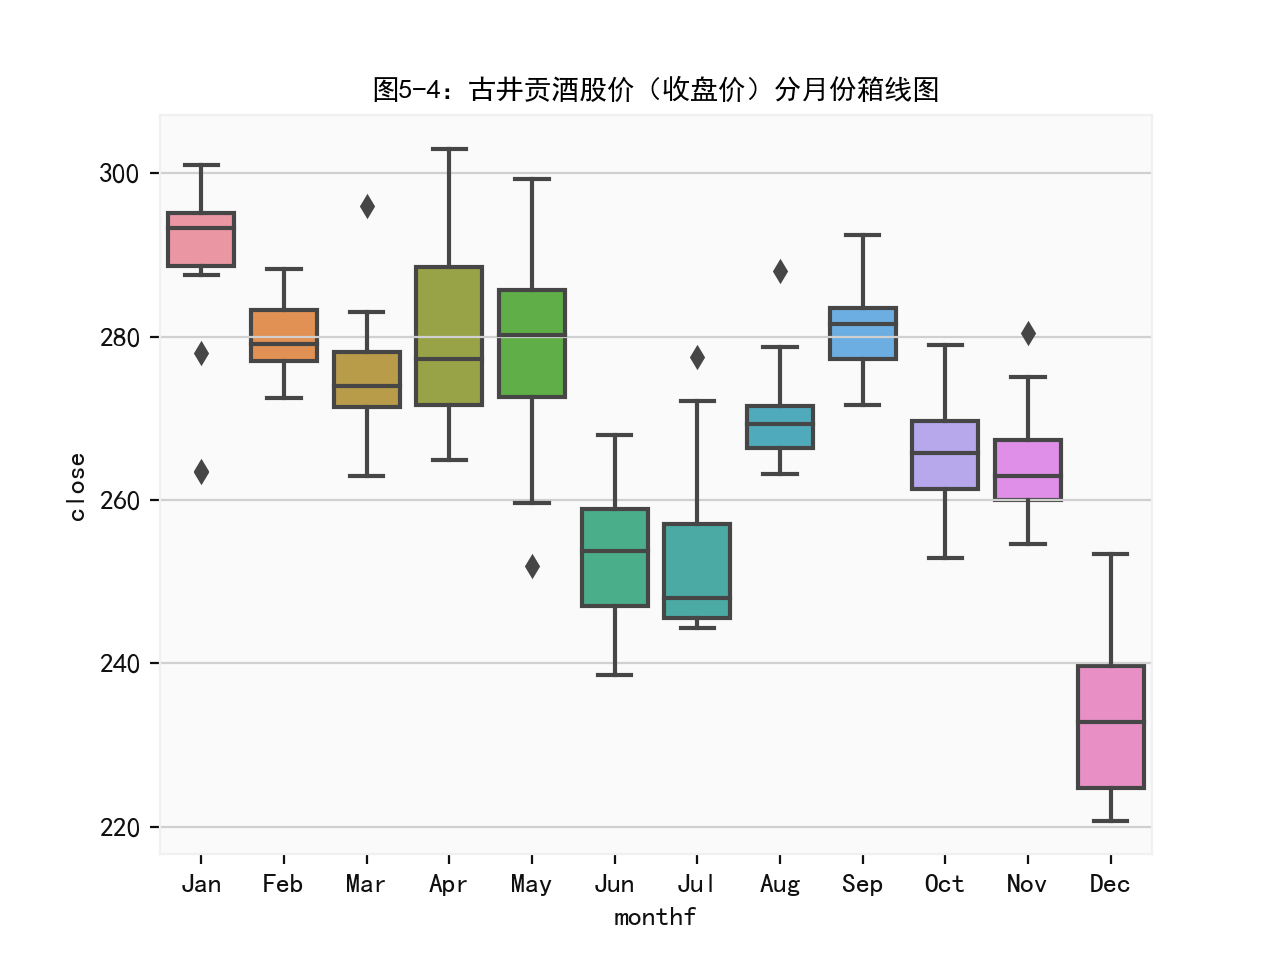

In [133]:
#画出分月份的收盘价箱线图
df['monthf']=df['month'].replace(np.arange(1,13,1), month_label)#进行替换
sns.boxplot(x=df[df['name']=='古井贡酒']['monthf'], y=df[df['name']=='古井贡酒']['close'])
plt.title('图5-4：古井贡酒股价（收盘价）分月份箱线图', fontsize=10)

In [114]:
#古井贡酒和泸州老窖（走向平稳）跌的较小，其余跌的较多。洋河和五粮液一路走低。
#泸州老窖和山西汾酒的比较

In [6]:
#用过去一段时间的收盘价去预测第二天的涨跌
df = pd.read_csv('2023年部分白酒业上市公司股价日线行情.csv')
df = df[df['name']=='贵州茅台']
df = df.reset_index(drop=True)
df = df.iloc[:,[0,1,2,5]]
df.head()

,ts_code,trade_date,open,close
0,600519.SH,20230103,1731.20,1730.01
1,600519.SH,20230104,1730.00,1725.01
2,600519.SH,20230105,1737.00,1801.00
3,600519.SH,20230106,1806.12,1803.77
4,600519.SH,20230109,1835.00,1841.20


In [11]:
#直接定义一个函数，去获取训练集和测试集
def get_data(code,start,end,window_len):
    #数据获取
    ts_pro = ts.pro_api('fe9ff67e8a79bbced955fd3b5ee351368d7ab2abf1af8668b096d88a')
    df = ts_pro.daily(ts_code=code,start_date=start,end_date=end,fields='ts_code,trade_date,open,close')
    df = df.reindex(index=df.index[::-1])  #重新索引为原来相反的方向
    df = df.reset_index(drop=True)  #对索引进行重新编号
     #目的：用过去一段时间的收盘价去预测第二天的涨跌
    #涨跌的判断：当天收盘>开盘，则涨。反之跌
    df['label'] = df['close']-df['open']   #判断涨跌
    arr = df[['close','label']].values   #转换为二维数组
    #进行特征提取及标注标签
    X=[]
    Label=[]
    #遍历数组
    for i in range(len(arr)-window_len-1):
        X.append(arr[i:i+window_len,0])    #将arr中第i行到第i+19行、第0列的数据添加到X当中，作为过去20日内的收盘价序列，以此为特征，去预测第二天的涨跌
        if arr[i+window_len,1]>0:
            Label.append(1)        #如果arr中第i+20行第1列的数据>0，即股票涨，记为标签1
        else:
            Label.append(0)
    #划分训练集与测试集,用2/3的数据作为训练集，剩下的作为测试集
    train_len = int(len(X) / 3) * 2
    X_train = X[:train_len]
    Label_train = Label[:train_len]
    X_test = X[train_len:]
    Label_test = Label[train_len:]
    return X_train,Label_train, X_test,Label_test


In [8]:
if __name__=='__main__':
    #通过上面的函数，获取训练数据和测试数据
    X_train,Label_train, X_test,Label_test = get_data('600519.SH','20230101','20231221',20)
    print(Label_train)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]


In [16]:
#解决异常：如果传入的参数个数不符合要求，则返回异常信息
def get_data0(*args, **kwargs):
    try:
        if len(args) != 4:
            raise ValueError("Error！参数个数传入出错")
        code, start, end, window_len = args
        window_size = kwargs.get('window_size', 20)
    except ValueError as e:
        print(f"{e}")
    #数据获取
    code, start, end, window_len = args
    ts_pro = ts.pro_api('fe9ff67e8a79bbced955fd3b5ee351368d7ab2abf1af8668b096d88a')
    df = ts_pro.daily(ts_code=code,start_date=start,end_date=end,fields='ts_code,trade_date,open,close')
    df = df.reindex(index=df.index[::-1])  #重新索引为原来相反的方向
    df = df.reset_index(drop=True)  #对索引进行重新编号
     #目的：用过去一段时间的收盘价去预测第二天的涨跌
    #涨跌的判断：当天收盘>开盘，则涨。反之跌
    df['label'] = df['close']-df['open']   #判断涨跌
    arr = df[['close','label']].values   #转换为二维数组
    #进行特征提取及标注标签
    X=[]
    Label=[]
    #遍历数组
    for i in range(len(arr)-window_len-1):
        X.append(arr[i:i+window_len,0])    #将arr中第i行到第i+19行、第0列的数据添加到X当中，作为过去20日内的收盘价序列，以此为特征，去预测第二天的涨跌
        if arr[i+window_len,1]>0:
            Label.append(1)        #如果arr中第i+20行第1列的数据>0，即股票涨，记为标签1
        else:
            Label.append(0)
    #划分训练集与测试集,用2/3的数据作为训练集，剩下的作为测试集
    train_len = int(len(X) / 3) * 2
    X_train = X[:train_len]
    Label_train = Label[:train_len]
    X_test = X[train_len:]
    Label_test = Label[train_len:]
    return X_train,Label_train, X_test,Label_test


# 错误的调用方式，将显示异常信息
X_train, Label_train, X_test, Label_test = get_data('600519.SH', '20230101', '20231221')  # 缺少窗口大小参数

#由于函数中读取数据时用到了参数信息，因此错误的参数个数除了显示异常信息外仍会报错

Error！参数个数传入出错


ValueError: not enough values to unpack (expected 4, got 3)

In [9]:
#设置20天的过去值。运用SVM模型进行预测
#使用SVM进行模型的训练与预测
from sklearn.svm import SVC
#实例化SVM模型，使用线性SVM。
svm = SVC(kernel='linear')
#模型训练
svm.fit(X_train,Label_train)
#模型预测
prediction = svm.predict(X_train)
print(prediction)

[0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
from sklearn.metrics import accuracy_score  #引入该模块以计算预测结果的准确性
print(accuracy_score(Label_train,prediction))   #表明该模型对于训练样本学习的好坏
prediction = svm.predict(X_test)
print(accuracy_score(Label_test,prediction))    #表明该模型对于测试样本的学习能力

0.6830985915492958
0.4657534246575342


In [13]:
#对滑动窗口进行优化
for window_len in range(90,100):
    X_train,Label_train, X_test,Label_test = get_data('600519.SH','20230101','20231221',window_len)
    svm = SVC(kernel='linear')
    svm.fit(X_train,Label_train)
    prediction = svm.predict(X_test)
    print(accuracy_score(Label_test,prediction)) 

0.4897959183673469
0.4791666666666667
0.4897959183673469
0.4791666666666667
0.46808510638297873
0.4791666666666667
0.46808510638297873
0.45652173913043476
0.48936170212765956
0.5


In [126]:
#滑动窗口设置长度为2、8、12、56、58时，预测的准确程度最高
#对五粮液等数据进行类似的预测
for window_len in range(1,30):
    X_train,Label_train, X_test,Label_test = get_data('000858.SZ','20230101','20231221',window_len)
    svm = SVC(kernel='linear')
    svm.fit(X_train,Label_train)
    print(window_len)
    prediction = svm.predict(X_test)
    print(accuracy_score(Label_test,prediction)) 

1
0.6025641025641025
2
0.5949367088607594
3
0.6025641025641025
4
0.6103896103896104
5
0.6025641025641025
6
0.6103896103896104
7
0.6052631578947368
8
0.6103896103896104
9
0.6052631578947368
10
0.6133333333333333
11
0.6052631578947368
12
0.6133333333333333
13
0.6081081081081081
14
0.6133333333333333
15
0.581081081081081
16
0.589041095890411
17
0.5945945945945946
18
0.6027397260273972
19
0.5833333333333334
20
0.6027397260273972
21
0.5694444444444444
22
0.5352112676056338
23
0.5555555555555556
24
0.49295774647887325
25
0.5714285714285714
26
0.4507042253521127
27
0.5142857142857142
28
0.5362318840579711
29
0.5285714285714286


In [14]:
import talib  #用于直接计算市场指标

In [15]:
 #用指标进行预测
def get_data2(code, start, end, timeperiod):
    # 数据获取
    ts_pro = ts.pro_api('fe9ff67e8a79bbced955fd3b5ee351368d7ab2abf1af8668b096d88a')
    df = ts_pro.daily(ts_code=code, start_date=start, end_date=end,
                  fields='ts_code,trade_date,open,close,high,low')
    df = df.reindex(index=df.index[::-1])
    # 索引重新编号
    df = df.reset_index(drop=True)
    # 判断涨跌
    df['label'] = df['close'] - df['open']
    # 计算其他指标
    df['MA'] = talib.MA(df['close'], timeperiod=timeperiod)
    df['ATR'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=timeperiod)
    df['RSI'] = talib.RSI(df['close'], timeperiod=timeperiod)
    df['CCI'] = talib.CCI(df['high'], df['low'], df['close'], timeperiod=timeperiod)
    # 删除包含空值的行数据
    df = df.dropna()
    # 转换为二维数组
    arr = df[['close','MA', 'ATR', 'RSI', 'CCI', 'label']].values
    # 特征提取以及标注标签
    X = []
    Label = []
    # 遍历数组
    for i in range(len(arr) - 1):
        X.append(arr[i, 0:5])
        if arr[i + 1, 5] > 0:
            Label.append(1)
        else:
            Label.append(0)
    train_len = int(len(X)/3) * 2
    # 划分训练集和测试集
    X_train = X[:train_len]
    Label_train = Label[:train_len]
    X_test = X[train_len:]
    Label_test = Label[train_len:]
    return X_train, Label_train, X_test, Label_test

In [18]:
#设置timeperiod为20
X_train, Label_train, X_test, Label_test = get_data2('600519.SH', '20230101', '20231231', 20)
 # # 实例化svm模型
svm = SVC(kernel='linear')
# # 模型训练
svm.fit(X_train, Label_train)
prediction = svm.predict(X_train)
print(accuracy_score(Label_train, prediction))  #训练集准确率
prediction = svm.predict(X_test)
print(accuracy_score(Label_test, prediction)) #测试集准确率

0.5684931506849316
0.5333333333333333


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tushare as ts
for timeperiod in range(2, 140):
    # 获取训练和测试数据
    X_train, Label_train, X_test, Label_test = get_data2('600519.SH', '20230101', '20231231', timeperiod)
    # # 实例化svm模型
    svm = SVC(kernel='linear')
    # # 模型训练
    svm.fit(X_train, Label_train)
    # 模型预测结果
    prediction = svm.predict(X_test)
    if accuracy_score(Label_test, prediction)>0.59:
        print(timeperiod, accuracy_score(Label_test, prediction))

15 0.6052631578947368
17 0.5921052631578947
52 0.6507936507936508
56 0.6190476190476191
57 0.6612903225806451
73 0.625


In [7]:
#更改参数范围
def get_data3(code, start, end, timeperiod1,timeperiod2,timeperiod3,timeperiod4):
    # 数据获取
    ts_pro = ts.pro_api('fe9ff67e8a79bbced955fd3b5ee351368d7ab2abf1af8668b096d88a')
    df = ts_pro.daily(ts_code=code, start_date=start, end_date=end,
                  fields='ts_code,trade_date,open,close,high,low')
    df = df.reindex(index=df.index[::-1])
    # 索引重新编号
    df = df.reset_index(drop=True)
    # 判断涨跌
    df['label'] = df['close'] - df['open']
    # 计算其他指标
    df['MA'] = talib.MA(df['close'], timeperiod=timeperiod1)
    df['ATR'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=timeperiod2)
    df['RSI'] = talib.RSI(df['close'], timeperiod=timeperiod3)
    df['CCI'] = talib.CCI(df['high'], df['low'], df['close'], timeperiod=timeperiod4)
    # 删除包含空值的行数据
    df = df.dropna()
    # 转换为二维数组
    arr = df[['close','MA', 'ATR', 'RSI', 'CCI', 'label']].values
    # 特征提取以及标注标签
    X = []
    Label = []
    # 遍历数组
    for i in range(len(arr) - 1):
        X.append(arr[i, 0:5])
        if arr[i + 1, 5] > 0:
            Label.append(1)
        else:
            Label.append(0)
    train_len = int(len(X)/3) * 2
    # 划分训练集和测试集
    X_train = X[:train_len]
    Label_train = Label[:train_len]
    X_test = X[train_len:]
    Label_test = Label[train_len:]
    return X_train, Label_train, X_test, Label_test

In [9]:
for timeperiod1 in range(5, 10):
    for timeperiod2 in range(5, 10):
        for timeperiod3 in range(5, 10):
            for timeperiod4 in range(5, 10):
                # 获取训练和测试数据
                X_train, Label_train, X_test, Label_test = get_data3('600519.SH', '20230101', '20231231', timeperiod1,timeperiod2,timeperiod3,timeperiod4)
                # # 实例化svm模型
                svm = SVC(kernel='linear')
                # # 模型训练
                svm.fit(X_train, Label_train)
                # 模型预测结果
                prediction = svm.predict(X_test)
                print(timeperiod1,timeperiod2,timeperiod3,timeperiod4, accuracy_score(Label_test, prediction))
    

5 5 5 5 0.5625
5 5 5 6 0.6125
5 5 5 7 0.5569620253164557
5 5 5 8 0.5384615384615384
5 5 5 9 0.4810126582278481
5 5 6 5 0.5316455696202531
5 5 6 6 0.569620253164557
5 5 6 7 0.5189873417721519
5 5 6 8 0.5512820512820513
5 5 6 9 0.569620253164557
5 5 7 5 0.5512820512820513
5 5 7 6 0.5256410256410257
5 5 7 7 0.5641025641025641
5 5 7 8 0.5769230769230769
5 5 7 9 0.5316455696202531
5 5 8 5 0.5063291139240507
5 5 8 6 0.5443037974683544
5 5 8 7 0.5569620253164557
5 5 8 8 0.5569620253164557
5 5 8 9 0.5443037974683544
5 5 9 5 0.5
5 5 9 6 0.5769230769230769
5 5 9 7 0.5128205128205128
5 5 9 8 0.6410256410256411
5 5 9 9 0.5512820512820513
5 6 5 5 0.569620253164557
5 6 5 6 0.620253164556962
5 6 5 7 0.5822784810126582
5 6 5 8 0.6025641025641025
5 6 5 9 0.5316455696202531
5 6 6 5 0.4936708860759494
5 6 6 6 0.5316455696202531
5 6 6 7 0.5569620253164557
5 6 6 8 0.5384615384615384
5 6 6 9 0.5443037974683544
5 6 7 5 0.5256410256410257
5 6 7 6 0.5769230769230769
5 6 7 7 0.5769230769230769
5 6 7 8 0.5512820

7 7 7 9 0.4430379746835443
7 7 8 5 0.5443037974683544
7 7 8 6 0.5063291139240507
7 7 8 7 0.5569620253164557
7 7 8 8 0.5569620253164557
7 7 8 9 0.4936708860759494
7 7 9 5 0.44871794871794873
7 7 9 6 0.5256410256410257
7 7 9 7 0.5641025641025641
7 7 9 8 0.5384615384615384
7 7 9 9 0.48717948717948717
7 8 5 5 0.45569620253164556
7 8 5 6 0.46835443037974683
7 8 5 7 0.5822784810126582
7 8 5 8 0.5316455696202531
7 8 5 9 0.5063291139240507
7 8 6 5 0.4810126582278481
7 8 6 6 0.46835443037974683
7 8 6 7 0.569620253164557
7 8 6 8 0.5189873417721519
7 8 6 9 0.4936708860759494
7 8 7 5 0.5189873417721519
7 8 7 6 0.5443037974683544
7 8 7 7 0.5569620253164557
7 8 7 8 0.5443037974683544
7 8 7 9 0.5063291139240507
7 8 8 5 0.5569620253164557
7 8 8 6 0.5569620253164557
7 8 8 7 0.5443037974683544
7 8 8 8 0.5569620253164557
7 8 8 9 0.5189873417721519
7 8 9 5 0.5641025641025641
7 8 9 6 0.5256410256410257
7 8 9 7 0.5897435897435898
7 8 9 8 0.5769230769230769
7 8 9 9 0.5256410256410257
7 9 5 5 0.52564102564102

9 9 9 6 0.5769230769230769
9 9 9 7 0.4230769230769231
9 9 9 8 0.48717948717948717
9 9 9 9 0.5384615384615384


In [10]:
#使用逻辑回归预测涨跌
#定义激活函数
def sigmoid(x):
    if x>0:
        return 1.0/(1.0+np.exp(-x))
    else:
        return np.exp(x)/(1.0+np.exp(x))

In [11]:
#定义LogisticRegression类
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # 初始化权重和偏置
        self.weights = np.zeros(num_features)
        self.bias = 0

        # 梯度下降
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return y_pred

    def predict(self, X, threshold=0.5):
        y_pred_prob = self.predict_prob(X)
        y_pred = np.zeros_like(y_pred_prob)
        y_pred[y_pred_prob >= threshold] = 1
        return y_pred


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 划分训练集和测试集
X_train, Label_train, X_test, Label_test = get_data('600519.SH', '20230101', '20231231', window_len=20)

# 创建Logistic回归模型
logreg = LogisticRegression()

# 训练模型
logreg.fit(X_train, Label_train)

# 预测测试集
prediction = logreg.predict(X_test)

# 计算预测准确率
accuracy = accuracy_score(Label_test, prediction)
print(accuracy)
prediction = logreg.predict(X_train)

# 计算预测准确率
accuracy = accuracy_score(Label_train, prediction)
print(accuracy)

0.52
0.6986301369863014


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#对滑动窗口进行优化
for window_len in range(1,60):
    X_train,Label_train, X_test,Label_test = get_data('600519.SH','20230101','20231221',window_len)
    logreg = LogisticRegression()
    logreg.fit(X_train, Label_train)
    prediction = logreg.predict(X_test)
    if accuracy_score(Label_test,prediction) > 0.58:
        print(window_len, accuracy_score(Label_test,prediction)) 

4 0.5844155844155844
8 0.5974025974025974
9 0.5921052631578947


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

44 0.5846153846153846


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [26]:
#用指标法进行预测
X_train, Label_train, X_test, Label_test = get_data2('600519.SH', '20230101', '20231231', 20)
logreg = LogisticRegression()
logreg.fit(X_train, Label_train)
prediction = logreg.predict(X_test)
print(accuracy_score(Label_test, prediction))
prediction = logreg.predict(X_train)
print(accuracy_score(Label_train, prediction))

0.4
0.589041095890411


In [28]:
#用指标法进行预测
for timeperiod in range(2,100):
    # 获取训练和测试数据
    X_train, Label_train, X_test, Label_test = get_data2('600519.SH', '20230101', '20231231', timeperiod)
    # 实例化逻辑回归模型
    logreg = LogisticRegression()
    logreg.fit(X_train, Label_train)
    prediction = logreg.predict(X_test)
    if accuracy_score(Label_test, prediction) > 0.56:
        print(timeperiod, accuracy_score(Label_test, prediction))

5 0.5625
53 0.59375
55 0.6451612903225806
57 0.6451612903225806
58 0.5901639344262295
59 0.5967741935483871
60 0.6229508196721312
61 0.5666666666666667
62 0.6229508196721312
63 0.5666666666666667
